### Load Label Indexes
This chunk loads a file that contains the labels we want to load from the datasets as well as their indicies.

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import (RandomOverSampler, SMOTE, ADASYN)
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.layers import Dropout
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from keras import backend as K 
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import plot_roc_curve


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline
class_names = ["Normal", "Corrupt", "Delay", "Duplicate", "Loss"]

seed = 0

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues, fig_size=(12,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)
    fig, ax = plt.subplots(figsize=fig_size, dpi= 80, facecolor='w', edgecolor='k')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  depreca

In [2]:
infile = open("../../tstat_labels_indexes.txt" ,'r')
data_field_list = []
for line in infile.readlines():
    if ":" in line:
        data_field = str(re.search('%s(.*)%s' % ("\"", "\""), line).group(1))
        index = int(re.search('%s(.*)%s' % (":", ","), line).group(1))
        data_field_list.append((data_field, index))

index_to_key_dict = {}
key_to_index_dict = {}
data_field_labels = []
for data_field, index in data_field_list:
    key_to_index_dict[data_field] = index
    index_to_key_dict[index] = data_field
    data_field_labels.append(data_field)


In [3]:
# infile = open("../../tstat-values-transformed.txt" ,'r')
# data_field_list = []
# for line in infile.readlines():
#     data_field, index, transform_index = line.split()
#     index_ = int(index)
#     transform_index_ = int(transform_index)
#     data_field_list.append((data_field, index_, transform_index_))
# index_to_key_dict = {}
# key_to_index_dict = {}
# index_to_tindex = {}
# data_field_labels = []
# for data_field, index, transform_index in data_field_list:
#     key_to_index_dict[data_field] = index
#     index_to_key_dict[index] = data_field
#     index_to_tindex[index] = transform_index
#     if(transform_index != -1):
#         data_field_labels.append(data_field)
#     print (str(index) + "--" + index_to_key_dict[index] + "-- tindex:" + str(transform_index))

In [4]:
# def plot_multiclass_roc(clf, X_test, y_test, n_classes = 5, figsize=(17, 6)):
#     y_score = clf.decision_function(X_test)

#     # structures
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()

#     # calculate dummies once
#     y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
#     for i in range(n_classes):
#         fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     # roc for each class
#     fig, ax = plt.subplots(figsize=figsize)
#     ax.plot([0, 1], [0, 1], 'k--')
#     ax.set_xlim([0.0, 1.0])
#     ax.set_ylim([0.0, 1.05])
#     ax.set_xlabel('False Positive Rate')
#     ax.set_ylabel('True Positive Rate')
#     ax.set_title('Receiver operating characteristic example')
#     for i in range(n_classes):
#         ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
#     ax.legend(loc="best")
#     ax.grid(alpha=.4)
#     sns.despine()
#     plt.show()

# plot_multiclass_roc(full_pipeline, X_test, y_test, n_classes=16, figsize=(16, 10))

### Read in a dataset file

In [5]:
def read_in_file(file_name):
    infile = open(file_name, 'r')
    header = infile.readline().split(' ')
    entries = []
    labels = None
    for i, line in enumerate(infile.readlines()):
        row = get_data_row(line)
        row = clean_data_row(row)
        if row != []:
            entries.append(row)
    entries = np.array(entries)
    return entries

### Get data row
Called by the read in file function. Loads a single line from the dataset files. Super inefficient, but only loads labels which are in the data field list. 

In [6]:
def get_data_row(line):
    global index_to_key_dict
    line = line.split(' ')
    row = []
    labels = []
    c_pkt_cnt = 0
    s_pkt_cnt = 0
    c_bytes_cnt = 0
    s_bytes_cnt = 0
    for data_field, index in data_field_list:
        #print("df:", data_field,"ix:",index)
        #print(line)
        
        
        if data_field == "client_pkt_cnt":
            try:
                c_pkt_cnt = line[index]
                c_pkt_cnt = max(float(c_pkt_cnt), 1)
            except:
                c_pkt_cnt = 1
            #if c_pkt_cnt < 32:
            #    return []
        elif data_field == "serv_pkt_cnt":
            try:
                s_pkt_cnt = line[index]
                s_pkt_cnt = max(float(s_pkt_cnt), 1)
            except:
                s_pkt_cnt = 1
        elif data_field == "client_bytes_cnt":
            try:
                c_bytes_cnt = line[index]
                c_bytes_cnt = max(float(c_bytes_cnt), 1)
            except:
                c_bytes_cnt = 1
        elif data_field == "serv_bytes_cnt":
            try:
                s_bytes_cnt = line[index]
                s_bytes_cnt = max(float(s_bytes_cnt), 1)
            except:
                s_bytes_cnt = 1
                
    for data_field, index in data_field_list:
        try:
            val = line[index]
            val = float(val)
        except:
            val = 0
        row.append(val)    
    return row

In [7]:
# packet_count_threshold = 200
# def get_data_row(file_name, line):
#     global index_to_key_dict
#     line = line.split(' ')
#     #print (line)
#     row = []
#     labels = []
#     c_pkt_cnt = 0
#     s_pkt_cnt = 0
#     c_bytes_cnt = 0
#     s_bytes_cnt = 0
#     if len(line) < 100:
#         print(file_name +" has smaller than 100 columns " + str(len(line)) + ", ignoring")
#         #print (line)
#         return row
#     # check if enough packet transferred to count as valid transfer
#     if int(line[2]) < packet_count_threshold:
#         return row
#     # check if the destination port matches with defaul Iperf port number 
#     if int(line[15]) != 5201:
#         return row
#     # check if connection duration is larger than 100 ms
#     if float(line[30]) < 100:
#         return row
#     for i in range(len(line)):
#         if i in index_to_key_dict and index_to_tindex[i] != -1:
#             val = float(line[i])
#             if index_to_tindex[i] > 0:
#                 tranformation_value = float(line[index_to_tindex[i]])
#                 if tranformation_value == 0:
#                     print (index_to_key_dict[index_to_tindex[i]] + " is zero")
#                     return []
#                 val = val / tranformation_value
#             #print ("Adding " + str(index_to_key_dict[i]) + " value:" + str(val))
#             row.append(val)
#         #elif i in index_to_key_dict:
#         #    print (str(i) +":" + str(i) + "-"  + index_to_key_dict[i] +  "   : tindex:"  + str(index_to_tindex[i])) 
#         #else:
#         #    print (str(i) + " not found in index_to_key_dict") 
#     #print ("Vector Size " + str(len(row)))
#     return row

### Clean data row
Not implemented

In [8]:
def clean_data_row(in_row):
    global index_to_key_dict, key_to_index_dict
    return in_row

### Get dataset
Loads all files from a directory

In [9]:
packet_count_threshold = 200
def get_dataset(path1,path2 ="",path3 =""):
    path = path1+str(path2)+path3
    out_data = []
    file = open('summary.out', 'w')
    for sub_dir in os.listdir(path):
        temp_path = os.path.join(path, sub_dir)
        temp_path = os.path.join(temp_path, "log_tcp_complete")
        if os.path.isfile(temp_path): 
            temp_data = np.nan_to_num(read_in_file(temp_path))
            rows_before = temp_data.shape[0]
            if rows_before == 0:
                continue
            temp_data = temp_data[temp_data[:,2] > packet_count_threshold]
            rows_after = temp_data.shape[0]
            print (path + " removed " + str(rows_before-rows_after) + "/" + str(rows_before) + " rows")
            if len(temp_data) == 0:
                continue
            if out_data == []:
                out_data = temp_data
            else:
                out_data = np.concatenate((out_data, temp_data))
    file.close
    return out_data

In [10]:
# packet_count_threshold = 200
# def get_dataset(path):
#     out_data = []
#     file = open('summary.out', 'w')
#     for sub_dir in os.listdir(path):
#         temp_path = os.path.join(path, sub_dir)
#         temp_path = os.path.join(temp_path, "log_tcp_complete")
#         if os.path.isfile(temp_path): 
#             temp_data = np.nan_to_num(read_in_file(temp_path))
#             '''
#             rows_before = temp_data.shape[0]
#             if rows_before == 0:
#                 continue
#             temp_data = temp_data[temp_data[:,2] > packet_count_threshold]
#             rows_after = temp_data.shape[0]
#             if rows_after/rows_before < 0.45:
#                 print (temp_path + " removed " + str(rows_before-rows_after) + "/" + str(rows_before) + " rows")
#             '''
#             if len(temp_data) == 0:
#                 continue
#             if out_data == []:
#                 out_data = temp_data
#             else:
#                 out_data = np.concatenate((out_data, temp_data))
#     file.close
#     print(path + "size--" + str(len(out_data)))
#     return out_data


### Load all datasets
Load all datasets
Create numerical lables for each class, and a different set of labels for each subclass.

In [11]:
prefix = "../../DataSet/ch/test";
ch_normal = get_dataset(prefix,"","/normal")
ch_corrupt_001 = get_dataset(prefix,"","/corrupt_0.01")
ch_corrupt_005 = get_dataset(prefix,"","/corrupt_0.05")
ch_corrupt_01 = get_dataset(prefix,"","/corrupt_0.1")
ch_corrupt_05 = get_dataset(prefix,"","/corrupt_0.5")

ch_delay_1_1 = get_dataset(prefix,"","/delay_100_var_20")
ch_delay_5_2 = get_dataset(prefix,"","/delay_5_var_2")
ch_delay_10_5 = get_dataset(prefix,"","/delay_10_var_5")
ch_delay_25_20 = get_dataset(prefix,"","/delay_25_var_20")

ch_loss_001 = get_dataset(prefix,"","/loss_0.01")
ch_loss_005 = get_dataset(prefix,"","/loss_0.05")
ch_loss_01 = get_dataset(prefix,"","/loss_0.1")
ch_loss_05 = get_dataset(prefix,"","/loss_0.5")

ch_duplicate_001 = get_dataset(prefix,"","/duplicate_0.01")
ch_duplicate_005 = get_dataset(prefix,"","/duplicate_0.05")
ch_duplicate_01 = get_dataset(prefix,"","/duplicate_0.1")
ch_duplicate_05 = get_dataset(prefix,"","/duplicate_0.5")

 

l1  = np.ones(len(ch_normal  ))    *1

l2  = np.ones(len(ch_corrupt_001  ))   *2
l3  = np.ones(len(ch_corrupt_005  ))   *2
l4  = np.ones(len(ch_corrupt_01  ))   *2
l5  = np.ones(len(ch_corrupt_05  ))   *2

l6  = np.ones(len(ch_delay_1_1))   *3
l7  = np.ones(len(ch_delay_5_2))   *3
l8  = np.ones(len(ch_delay_10_5))  *3
l9  = np.ones(len(ch_delay_25_20)) *3

l10  = np.ones(len(ch_loss_001 ) )   *5
l11  = np.ones(len(ch_loss_005 ) )   *5
l12  = np.ones(len(ch_loss_01 ) )   *5
l13  = np.ones(len(ch_loss_05))      *5

l14 = np.ones(len(ch_duplicate_001 ) )    *4
l15  = np.ones(len(ch_duplicate_005 ) )   *4
l16  = np.ones(len(ch_duplicate_01 ) )   *4
l17  = np.ones(len(ch_duplicate_05 ) )   *4



ch_data = np.concatenate((ch_normal,
    ch_corrupt_001,
    ch_corrupt_005,
    ch_corrupt_01,
    ch_corrupt_05,                
    ch_delay_1_1,
    ch_delay_5_2,
    ch_delay_10_5,
    ch_delay_25_20,
    ch_loss_001,
    ch_loss_005,
    ch_loss_01,
    ch_loss_05,
    ch_duplicate_001,
    ch_duplicate_005,
    ch_duplicate_01,
    ch_duplicate_05))

pandas_ch = pd.DataFrame(data=ch_data, 
              columns=data_field_labels)

# pca = PCA(n_components=20)

# ch_data = pca.fit_transform(pandas_ch)



ch_anom_type_data_labels = np.concatenate((l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17))
ch_anom_type_data_labels = pd.DataFrame(data=ch_anom_type_data_labels)
ch_anom_type_data_labels = ch_anom_type_data_labels.values.ravel()






A = ["30m40ms","30m60ms","100m20ms","100m40ms","100m60ms","1g20ms","1g40ms","1g60ms","cubicbridge20"]

emulab_normal = []
emulab_corrupt_001 = []
emulab_corrupt_005 = []
emulab_corrupt_01 = []
emulab_corrupt_05 = []

emulab_delay_1_1 = []
emulab_delay_5_2 = []
emulab_delay_10_5 = []
emulab_delay_25_20 = []

emulab_loss_001 = []
emulab_loss_005 = []
emulab_loss_01 = []
emulab_loss_05 =[]

emulab_duplicate_001 = []
emulab_duplicate_005 =[]
emulab_duplicate_01 = []
emulab_duplicate_05 = []


prefix = "../../DataSet/emulab/true/base_delay/";
emulab_normal = get_dataset(prefix,"30m20ms","/normal")
emulab_corrupt_001 = get_dataset(prefix,"30m20ms","/corrupt_0.01")
emulab_corrupt_005 = get_dataset(prefix,"30m20ms","/corrupt_0.05")
emulab_corrupt_01 = get_dataset(prefix,"30m20ms","/corrupt_0.1")
emulab_corrupt_05 = get_dataset(prefix,"30m20ms","/corrupt_0.5")

emulab_delay_1_1 = get_dataset(prefix,"30m20ms","/delay_1_var_1")
emulab_delay_5_2 = get_dataset(prefix,"30m20ms","/delay_5_var_2")
emulab_delay_10_5 = get_dataset(prefix,"30m20ms","/delay_10_var_5")
emulab_delay_25_20 = get_dataset(prefix,"30m20ms","/delay_25_var_20")

emulab_loss_001 = get_dataset(prefix,"30m20ms","/loss_0.01")
emulab_loss_005 = get_dataset(prefix,"30m20ms","/loss_0.05")
emulab_loss_01 = get_dataset(prefix,"30m20ms","/loss_0.1")
emulab_loss_05 = get_dataset(prefix,"30m20ms","/loss_0.5")

emulab_duplicate_001 = get_dataset(prefix,"30m20ms","/duplicate_0.01")
emulab_duplicate_005 = get_dataset(prefix,"30m20ms","/duplicate_0.05")
emulab_duplicate_01 = get_dataset(prefix,"30m20ms","/duplicate_0.1")
emulab_duplicate_05 = get_dataset(prefix,"30m20ms","/duplicate_0.5")

 

for a in A:
    emulab_normal = np.concatenate((emulab_normal,get_dataset(prefix,a,"/normal")))
    
    emulab_corrupt_001= np.concatenate((get_dataset(prefix,a,"/corrupt_0.01"),emulab_corrupt_001))
    emulab_corrupt_005= np.concatenate((get_dataset(prefix,a,"/corrupt_0.05"),emulab_corrupt_005))
    emulab_corrupt_01= np.concatenate((get_dataset(prefix,a,"/corrupt_0.1"),emulab_corrupt_01))
    emulab_corrupt_05= np.concatenate((get_dataset(prefix,a,"/corrupt_0.5"),emulab_corrupt_05))
                                 
    emulab_delay_1_1= np.concatenate((get_dataset(prefix,a,"/delay_1_var_1"),emulab_delay_1_1))
    emulab_delay_5_2= np.concatenate((get_dataset(prefix,a,"/delay_5_var_2"),emulab_delay_5_2))
    emulab_delay_10_5= np.concatenate((get_dataset(prefix,a,"/delay_10_var_5"),emulab_delay_10_5))
    emulab_delay_25_20= np.concatenate((get_dataset(prefix,a,"/delay_25_var_20"),emulab_delay_25_20))
    
    emulab_loss_001= np.concatenate((get_dataset(prefix,a,"/loss_0.01"),emulab_loss_001))
    emulab_loss_005= np.concatenate((get_dataset(prefix,a,"/loss_0.05"),emulab_loss_005))
    emulab_loss_01= np.concatenate((get_dataset(prefix,a,"/loss_0.1"),emulab_loss_01))
    emulab_loss_05= np.concatenate((get_dataset(prefix,a,"/loss_0.5"),emulab_loss_05))
    
    emulab_duplicate_001 = np.concatenate((get_dataset(prefix,a,"/duplicate_0.01"),emulab_duplicate_001))
    emulab_duplicate_005 = np.concatenate((get_dataset(prefix,a,"/duplicate_0.05"),emulab_duplicate_005))
    emulab_duplicate_01 = np.concatenate((get_dataset(prefix,a,"/duplicate_0.1"),emulab_duplicate_01))
    emulab_duplicate_05 = np.concatenate((get_dataset(prefix,a,"/duplicate_0.5"),emulab_duplicate_05))

    

l1  = np.ones(len(emulab_normal  ))    *1

l2  = np.ones(len(emulab_corrupt_001  ))   *2
l3  = np.ones(len(emulab_corrupt_005  ))   *2
l4  = np.ones(len(emulab_corrupt_01  ))   *2
l5  = np.ones(len(emulab_corrupt_05  ))   *2

l6  = np.ones(len(emulab_delay_1_1))   *3
l7  = np.ones(len(emulab_delay_5_2))   *3
l8  = np.ones(len(emulab_delay_10_5))  *3
l9  = np.ones(len(emulab_delay_25_20)) *3

l10  = np.ones(len(emulab_loss_001 ) )   *5
l11  = np.ones(len(emulab_loss_005 ) )   *5
l12  = np.ones(len(emulab_loss_01 ) )   *5
l13  = np.ones(len(emulab_loss_05))      *5

l14 = np.ones(len(emulab_duplicate_001 ) )    *4
l15  = np.ones(len(emulab_duplicate_005 ) )   *4
l16  = np.ones(len(emulab_duplicate_01 ) )   *4
l17  = np.ones(len(emulab_duplicate_05 ) )   *4






emulab_data = np.concatenate((emulab_normal,
    emulab_corrupt_001,
    emulab_corrupt_005,
    emulab_corrupt_01,
    emulab_corrupt_05,                
    emulab_delay_1_1,
    emulab_delay_5_2,
    emulab_delay_10_5,
    emulab_delay_25_20,
    emulab_loss_001,
    emulab_loss_005,
    emulab_loss_01,
    emulab_loss_05,
    emulab_duplicate_001,
    emulab_duplicate_005,
    emulab_duplicate_01,
    emulab_duplicate_05))

pandas_emulab = pd.DataFrame(data=emulab_data, 
              columns=data_field_labels)

# emulab_data = pca.fit_transform(pandas_emulab)




emulab_anom_type_data_labels = np.concatenate((l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17))
emulab_anom_type_data_labels = pd.DataFrame(data=emulab_anom_type_data_labels)
emulab_anom_type_data_labels = emulab_anom_type_data_labels.values.ravel()






hpc_normal = get_dataset("../../DataSet/hpc/normal")
hpc_corr_01 = get_dataset("../../DataSet/hpc/corrupt_0.1perc")
hpc_corr_05 = get_dataset("../../DataSet/hpc/corrupt_0.5perc")
hpc_corr_10 = get_dataset("../../DataSet/hpc/corrupt_1.0perc")
hpc_delay_1_1 = get_dataset("../../DataSet/hpc/delay_1_var_1")
hpc_delay_5_2 = get_dataset("../../DataSet/hpc/delay_5_var_2")
hpc_delay_10_5 = get_dataset("../../DataSet/hpc/delay_10_var_5")
hpc_delay_25_20 = get_dataset("../../DataSet/hpc/delay_25_var_20")
hpc_drop_01 = get_dataset("../../DataSet/hpc/loss_5perc")
hpc_drop_001 = get_dataset("../../DataSet/hpc/loss_10perc")
hpc_drop_0005 = get_dataset("../../DataSet/hpc/loss_15perc")
# hpc_dup_1 = get_dataset("../../DataSet/hpc/dup_10perc")
# hpc_dup_2 = get_dataset("../../DataSet/hpc/dup_20perc")


hpc_corrupt_001 = get_dataset("../../DataSet/hpc/corrupt_0.01")
hpc_corrupt_005 = get_dataset("../../DataSet/hpc/corrupt_0.05")
hpc_corrupt_01 = get_dataset("../../DataSet/hpc/corrupt_0.1")
hpc_corrupt_05 = get_dataset("../../DataSet/hpc/corrupt_0.5")
hpc_duplicate_001 = get_dataset("../../DataSet/hpc/duplicate_0.01")
hpc_duplicate_005 = get_dataset("../../DataSet/hpc/duplicate_0.05")
hpc_duplicate_01 = get_dataset("../../DataSet/hpc/duplicate_0.1")
hpc_duplicate_05 = get_dataset("../../DataSet/hpc/duplicate_0.5")
hpc_loss_001 = get_dataset("../../DataSet/hpc/loss_0.01")
hpc_loss_005 = get_dataset("../../DataSet/hpc/loss_0.05")
hpc_loss_01 = get_dataset("../../DataSet/hpc/loss_0.1")
hpc_loss_05 = get_dataset("../../DataSet/hpc/loss_0.5")



hpc_l1  = np.ones(len(hpc_normal  ))    *1
hpc_l2  = np.ones(len(hpc_corr_01  ))   *2
hpc_l3  = np.ones(len(hpc_corr_05  ))   *2
hpc_l4  = np.ones(len(hpc_corr_10  ))   *2
hpc_l5  = np.ones(len(hpc_corrupt_001  ))   *2
hpc_l6  = np.ones(len(hpc_corrupt_005  ))   *2
hpc_l7  = np.ones(len(hpc_corrupt_01  ))   *2
hpc_l8  = np.ones(len(hpc_corrupt_05  ))   *2
hpc_l9  = np.ones(len(hpc_delay_1_1))   *3
hpc_l10  = np.ones(len(hpc_delay_5_2))   *3
hpc_l11  = np.ones(len(hpc_delay_10_5))  *3
hpc_l12  = np.ones(len(hpc_delay_25_20)) *3
hpc_l13  = np.ones(len(hpc_drop_01))     *5
hpc_l14  = np.ones(len(hpc_drop_001))    *5
hpc_l15  = np.ones(len(hpc_drop_0005))   *5
hpc_l16  = np.ones(len(hpc_loss_001))   *5
hpc_l17  = np.ones(len(hpc_loss_005))   *5
hpc_l18  = np.ones(len(hpc_loss_01))   *5
hpc_l19  = np.ones(len(hpc_loss_05))   *5
# hpc_l20  = np.ones(len(hpc_dup_1))       *4
# hpc_l21  = np.ones(len(hpc_dup_2))       *4
hpc_l22  = np.ones(len(hpc_duplicate_001))       *4
hpc_l23  = np.ones(len(hpc_duplicate_005))       *4
hpc_l24  = np.ones(len(hpc_duplicate_01))       *4
hpc_l25  = np.ones(len(hpc_duplicate_05))       *4

hpc_data = np.concatenate((hpc_normal, 
                           hpc_corr_01, hpc_corr_05, hpc_corr_10,
                           hpc_corrupt_001,hpc_corrupt_005,hpc_corrupt_01,hpc_corrupt_05,
                           hpc_delay_1_1, hpc_delay_5_2,hpc_delay_10_5,hpc_delay_25_20,
                           hpc_drop_01, hpc_drop_001, hpc_drop_0005,
                           hpc_loss_001,hpc_loss_005,hpc_loss_01,hpc_loss_05,hpc_duplicate_001,hpc_duplicate_005,hpc_duplicate_01,hpc_duplicate_05))

# hpc_data = np.concatenate((hpc_normal, 
#                            hpc_corrupt_001,hpc_corrupt_005,hpc_corrupt_01,hpc_corrupt_05,
#                            hpc_delay_1_1, hpc_delay_5_2,hpc_delay_10_5,hpc_delay_25_20,
#                            hpc_loss_001,hpc_loss_005,hpc_loss_01,hpc_loss_05,hpc_duplicate_001,hpc_duplicate_005,hpc_duplicate_01,hpc_duplicate_05))


# hpc_anom_type_data_labels = np.concatenate((hpc_l1, hpc_l5, 
#                                             hpc_l6, hpc_l7, hpc_l8, 
#                                             hpc_l9, hpc_l10, hpc_l11, 
#                                             hpc_l12, hpc_l16, 
#                                             hpc_l17, hpc_l18,hpc_l19, hpc_l22,hpc_l23,hpc_l24,hpc_l25))

hpc_anom_type_data_labels = np.concatenate((hpc_l1, hpc_l2, hpc_l3,hpc_l4,hpc_l5,
                                            hpc_l6, hpc_l7, hpc_l8, 
                                            hpc_l9, hpc_l10, hpc_l11,
                                            hpc_l12,hpc_l13,hpc_l14,hpc_l15, hpc_l16, 
                                            hpc_l17, hpc_l18,hpc_l19, hpc_l22,hpc_l23,hpc_l24
                                            ,hpc_l25))


pandas_hpc = pd.DataFrame(data=hpc_data, 
              columns=data_field_labels)

# hpc_data = pca.fit_transform(pandas_hpc)



# hpc_data = MinMaxScaler().fit_transform(hpc_data)


hpc_anom_type_data_labels = pd.DataFrame(data=hpc_anom_type_data_labels)
hpc_anom_type_data_labels = hpc_anom_type_data_labels.values.ravel()


print(pandas_hpc.shape)
print(hpc_anom_type_data_labels.shape)

dtn_normal = get_dataset("../../DataSet/dtn/FINAL_DATA/normal")
dtn_normal2 = get_dataset("../../DataSet/dtn/DTN_LONG_DATA/normal")
dtn_corr_01 = get_dataset("../../DataSet/dtn/FINAL_DATA/corrupt_0.1perc")
dtn_corr_05 = get_dataset("../../DataSet/dtn/FINAL_DATA/corrupt_0.5perc")
dtn_corr_10 = get_dataset("../../DataSet/dtn/FINAL_DATA/corrupt_1.0perc")
dtn_delay_1_1 = get_dataset("../../DataSet/dtn/FINAL_DATA/delay_1_var_1")
dtn_delay_5_2 = get_dataset("../../DataSet/dtn/FINAL_DATA/delay_5_var_2")
dtn_delay_10_5 = get_dataset("../../DataSet/dtn/FINAL_DATA/delay_10_var_5")
dtn_delay_25_20 = get_dataset("../../DataSet/dtn/FINAL_DATA/delay_25_var_20")
dtn_drop_01 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_1perc")
dtn_drop_5 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_5perc")
dtn_drop_10 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_10perc")
dtn_drop_15 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_15perc")
dtn_dup_01 = get_dataset("../../DataSet/dtn/FINAL_DATA/dup_0.1perc")
# dtn_dup_1 = get_dataset("../../DataSet/dtn/FINAL_DATA/dup_1perc")
# dtn_dup_2 = get_dataset("../../DataSet/dtn/FINAL_DATA/dup_2perc")

dtn_corrupt_001 = get_dataset("../../DataSet/dtn/FINAL_DATA/corrupt_0.01")
dtn_corrupt_005 = get_dataset("../../DataSet/dtn/FINAL_DATA/corrupt_0.05")
dtn_corrupt_01 = get_dataset("../../DataSet/dtn/FINAL_DATA/corrupt_0.1")
dtn_corrupt_05 = get_dataset("../../DataSet/dtn/FINAL_DATA/corrupt_0.5")
dtn_duplicate_001 = get_dataset("../../DataSet/dtn/FINAL_DATA/duplicate_0.01")
dtn_duplicate_005 = get_dataset("../../DataSet/dtn/FINAL_DATA/duplicate_0.05")
dtn_duplicate_01 = get_dataset("../../DataSet/dtn/FINAL_DATA/duplicate_0.1")
dtn_duplicate_05 = get_dataset("../../DataSet/dtn/FINAL_DATA/duplicate_0.5")
dtn_loss_001 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_0.01")
dtn_loss_005 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_0.05")
dtn_loss_01 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_0.1")
dtn_loss_05 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_0.5")


l1  = np.ones(len(dtn_normal)+len(dtn_normal2)) *1
l2  = np.ones(len(dtn_corr_01  ))   *2
l3  = np.ones(len(dtn_corr_05  ))   *2
l4  = np.ones(len(dtn_corr_10  ))   *2
l5  = np.ones(len(dtn_corrupt_001  ))  *2
l6  = np.ones(len(dtn_corrupt_005  ))  *2
l7  = np.ones(len(dtn_corrupt_01  ))   *2
l8  = np.ones(len(dtn_corrupt_05  ))   *2
l9  = np.ones(len(dtn_delay_1_1))   *3
l10  = np.ones(len(dtn_delay_5_2))   *3
l11  = np.ones(len(dtn_delay_10_5))  *3
l12  = np.ones(len(dtn_delay_25_20)) *3
l13  = np.ones(len(dtn_drop_01 ) ) *5
l14  = np.ones(len(dtn_drop_5) )   *5
l15  = np.ones(len(dtn_drop_10) )  *5
l16 = np.ones(len(dtn_drop_15) )   *5
l17  = np.ones(len(dtn_loss_001))  *5
l18  = np.ones(len(dtn_loss_005))  *5
l19  = np.ones(len(dtn_loss_01))   *5
l20  = np.ones(len(dtn_loss_05))   *5
# l21  = np.ones(len(dtn_dup_01))    *4
# l22  = np.ones(len(dtn_dup_1))     *4
# l23  = np.ones(len(dtn_dup_2))     *4
l24  = np.ones(len(dtn_duplicate_001)) *4
l25  = np.ones(len(dtn_duplicate_005))*4
l26  = np.ones(len(dtn_duplicate_01)) *4
l27  = np.ones(len(dtn_duplicate_05)) *4




dtn_data = np.concatenate((dtn_normal, dtn_normal2,
                           dtn_corr_01, dtn_corr_05, dtn_corr_10,
                           dtn_corrupt_001, dtn_corrupt_005, dtn_corrupt_01, dtn_corrupt_05, 
                           dtn_delay_1_1, dtn_delay_5_2,dtn_delay_10_5,dtn_delay_25_20,
                           dtn_drop_01, dtn_drop_5, dtn_drop_10, dtn_drop_15, dtn_loss_001,
                           dtn_loss_005, dtn_loss_01, dtn_loss_05,                          
                           dtn_duplicate_001,
                           dtn_duplicate_005, dtn_duplicate_01, dtn_duplicate_05))



# dtn_data = np.concatenate(( dtn_normal,
#                            dtn_corrupt_001, dtn_corrupt_005, dtn_corrupt_01, dtn_corrupt_05, 
#                            dtn_delay_1_1, dtn_delay_5_2,dtn_delay_10_5,dtn_delay_25_20,
#                  dtn_loss_001,
#                            dtn_loss_005, dtn_loss_01, dtn_loss_05,dtn_duplicate_001,
#                            dtn_duplicate_005, dtn_duplicate_01, dtn_duplicate_05))
print("###########")
print(data_field_labels)
print("###########")
pandas_dtn = pd.DataFrame(data=dtn_data, 
              columns=data_field_labels)




# dtn_data = pca.fit_transform(pandas_dtn)


# dtn_data = MinMaxScaler().fit_transform(dtn_data)



dtn_anom_type_data_labels = np.concatenate((l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14,l15,
                                           l16, l17, l18, l19, l20, l24,l25,l26,l27))

# dtn_anom_type_data_labels = np.concatenate((l1, l5, l6, l7, l8, l9, l10, l11, l12
#                                             , l17, l18, l19, l20, l24,l25,l26,l27))

dtn_anom_type_data_labels = pd.DataFrame(data=dtn_anom_type_data_labels)
dtn_anom_type_data_labels = dtn_anom_type_data_labels.values.ravel()


print(pandas_dtn.shape)
print(dtn_anom_type_data_labels.shape)



../../DataSet/ch/test/normal removed 121/241 rows
../../DataSet/ch/test/normal removed 124/243 rows
../../DataSet/ch/test/normal removed 123/243 rows
../../DataSet/ch/test/corrupt_0.01 removed 122/241 rows
../../DataSet/ch/test/corrupt_0.05 removed 128/247 rows
../../DataSet/ch/test/corrupt_0.1 removed 120/239 rows
../../DataSet/ch/test/corrupt_0.5 removed 121/240 rows
../../DataSet/ch/test/delay_100_var_20 removed 123/199 rows
../../DataSet/ch/test/delay_5_var_2 removed 122/207 rows
../../DataSet/ch/test/delay_10_var_5 removed 123/203 rows
../../DataSet/ch/test/delay_25_var_20 removed 120/193 rows
../../DataSet/ch/test/loss_0.01 removed 121/240 rows
../../DataSet/ch/test/loss_0.05 removed 123/242 rows
../../DataSet/ch/test/loss_0.1 removed 125/244 rows
../../DataSet/ch/test/loss_0.5 removed 122/240 rows


/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


../../DataSet/ch/test/duplicate_0.01 removed 130/250 rows
../../DataSet/ch/test/duplicate_0.05 removed 120/239 rows
../../DataSet/ch/test/duplicate_0.1 removed 123/243 rows
../../DataSet/ch/test/duplicate_0.5 removed 120/240 rows
../../DataSet/emulab/true/base_delay/30m20ms/normal removed 119/238 rows
../../DataSet/emulab/true/base_delay/30m20ms/normal removed 119/238 rows
../../DataSet/emulab/true/base_delay/30m20ms/normal removed 119/238 rows
../../DataSet/emulab/true/base_delay/30m20ms/corrupt_0.01 removed 119/237 rows
../../DataSet/emulab/true/base_delay/30m20ms/corrupt_0.05 removed 119/238 rows
../../DataSet/emulab/true/base_delay/30m20ms/corrupt_0.1 removed 119/238 rows
../../DataSet/emulab/true/base_delay/30m20ms/corrupt_0.5 removed 119/236 rows
../../DataSet/emulab/true/base_delay/30m20ms/delay_1_var_1 removed 118/197 rows
../../DataSet/emulab/true/base_delay/30m20ms/delay_5_var_2 removed 117/205 rows
../../DataSet/emulab/true/base_delay/30m20ms/delay_10_var_5 removed 118/205 r

../../DataSet/emulab/true/base_delay/100m60ms/duplicate_0.05 removed 119/239 rows
../../DataSet/emulab/true/base_delay/100m60ms/duplicate_0.1 removed 119/237 rows
../../DataSet/emulab/true/base_delay/100m60ms/duplicate_0.5 removed 119/237 rows
../../DataSet/emulab/true/base_delay/1g20ms/normal removed 119/236 rows
../../DataSet/emulab/true/base_delay/1g20ms/normal removed 119/238 rows
../../DataSet/emulab/true/base_delay/1g20ms/normal removed 119/236 rows
../../DataSet/emulab/true/base_delay/1g20ms/corrupt_0.01 removed 119/238 rows
../../DataSet/emulab/true/base_delay/1g20ms/corrupt_0.05 removed 119/237 rows
../../DataSet/emulab/true/base_delay/1g20ms/corrupt_0.1 removed 119/238 rows
../../DataSet/emulab/true/base_delay/1g20ms/corrupt_0.5 removed 120/236 rows
../../DataSet/emulab/true/base_delay/1g20ms/delay_1_var_1 removed 118/198 rows
../../DataSet/emulab/true/base_delay/1g20ms/delay_5_var_2 removed 118/205 rows
../../DataSet/emulab/true/base_delay/1g20ms/delay_10_var_5 removed 118/1

../../DataSet/hpc/loss_10perc removed 1144/1489 rows
../../DataSet/hpc/loss_10perc removed 435/539 rows
../../DataSet/hpc/loss_10perc removed 1668/2009 rows
../../DataSet/hpc/loss_10perc removed 758/975 rows
../../DataSet/hpc/loss_10perc removed 1279/1610 rows
../../DataSet/hpc/loss_10perc removed 1383/1715 rows
../../DataSet/hpc/loss_10perc removed 631/786 rows
../../DataSet/hpc/loss_10perc removed 1158/1505 rows
../../DataSet/hpc/loss_10perc removed 1153/1499 rows
../../DataSet/hpc/loss_10perc removed 658/820 rows
../../DataSet/hpc/loss_10perc removed 1206/1546 rows
../../DataSet/hpc/loss_10perc removed 1192/1531 rows
../../DataSet/hpc/loss_10perc removed 1570/1926 rows
../../DataSet/hpc/loss_10perc removed 1517/1858 rows
../../DataSet/hpc/loss_15perc removed 1941/2291 rows
../../DataSet/hpc/loss_15perc removed 611/768 rows
../../DataSet/hpc/loss_15perc removed 6/6 rows
../../DataSet/hpc/corrupt_0.01 removed 753/873 rows
../../DataSet/hpc/corrupt_0.05 removed 753/873 rows
../../DataS

### Split Datasets (randomized on seed value)



In [12]:
INPUT_SIZE = ch_data.shape[1]
ENCODING_SIZE = 10
input_img = Input(shape=(INPUT_SIZE,))
encoded = Dense(80, activation='relu')(input_img)
encoded = Dense(50, activation='relu')(encoded)

encoded = Dense(ENCODING_SIZE, activation='relu')(encoded)
 
decoded = Dense(50, activation='relu')(encoded)
decoded = Dense(80, activation='relu')(decoded)
decoded = Dense(INPUT_SIZE, activation='relu')(decoded)
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(ch_data, ch_data, epochs=10, batch_size=256, shuffle=True, validation_split=0.2)
autoencoder.fit(dtn_data, dtn_data, epochs=10, batch_size=256, shuffle=True, validation_split=0.2)
autoencoder.fit(emulab_data, emulab_data, epochs=10, batch_size=256, shuffle=True, validation_split=0.2)
autoencoder.fit(hpc_data, hpc_data, epochs=10, batch_size=256, shuffle=True, validation_split=0.2)

hpc_data = autoencoder.predict(hpc_data)
ch_data = autoencoder.predict(ch_data)
dtn_data = autoencoder.predict(dtn_data)
emulab_data = autoencoder.predict(emulab_data)

dtn_data = PowerTransformer().fit_transform(pandas_dtn)
hpc_data = PowerTransformer().fit_transform(pandas_hpc)
emulab_data = PowerTransformer().fit_transform(pandas_emulab)
ch_data = PowerTransformer().fit_transform(pandas_ch)



Train on 1682 samples, validate on 421 samples
Epoch 1/10
1682/1682 [==============================] - 0s 206us/step - loss: 7675461934577141.0000 - val_loss: 18505690529711988.0000
Epoch 2/10
1682/1682 [==============================] - 0s 28us/step - loss: 6167213777213550.0000 - val_loss: 12751751444070322.0000
Epoch 3/10
1682/1682 [==============================] - 0s 28us/step - loss: 3567085405574674.0000 - val_loss: 4377293372592857.5000
Epoch 4/10
1682/1682 [==============================] - 0s 24us/step - loss: 751490338349182.6250 - val_loss: 678551142329327.0000
Epoch 5/10
1682/1682 [==============================] - 0s 35us/step - loss: 422751032252272.3125 - val_loss: 519378417288880.3125
Epoch 6/10
1682/1682 [==============================] - 0s 22us/step - loss: 82046906073633.4844 - val_loss: 154864503026490.9688
Epoch 7/10
1682/1682 [==============================] - 0s 17us/step - loss: 106388943886484.5469 - val_loss: 133072461995078.5156
Epoch 8/10
1682/1682 [======

/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:122: 

In [13]:
# ch_data = TSNE(n_components=2).fit_transform(ch_data)
# dtn_data = TSNE(n_components=2).fit_transform(dtn_data)
# emulab_data = TSNE(n_components=2).fit_transform(emulab_data)
# hpc_data = TSNE(n_components=2).fit_transform(hpc_data)
new_combine_date =  np.concatenate((dtn_data,ch_data,emulab_data,hpc_data))


# new_combine_date = TSNE(n_components=2).fit_transform(new_combine_date)



new_combine_label =  np.concatenate((dtn_anom_type_data_labels,ch_anom_type_data_labels
                                     ,emulab_anom_type_data_labels,hpc_anom_type_data_labels))

new_train_data, new_test_data, new_train_labels, new_test_labels = train_test_split(new_combine_date, 
                                                                   new_combine_label, random_state=seed)
new_train_data, new_train_labels = SMOTE().fit_resample(new_train_data, new_train_labels)


ch_train_data, ch_test_data, ch_train_labels, ch_test_labels = train_test_split(ch_data, 
                                                                   ch_anom_type_data_labels, random_state=seed)
ch_train_data, ch_train_labels = SMOTE().fit_resample(ch_train_data, ch_train_labels)

dtn_train_data, dtn_test_data, dtn_train_labels, dtn_test_labels = train_test_split(dtn_data, 
                                                                   dtn_anom_type_data_labels, random_state=seed)
dtn_train_data, dtn_train_labels = SMOTE().fit_resample(dtn_train_data, dtn_train_labels)

emulab_train_data, emulab_test_data, emulab_train_labels, emulab_test_labels = train_test_split(emulab_data, emulab_anom_type_data_labels
                                                                    , random_state=seed)
emulab_train_data, emulab_train_labels = SMOTE().fit_resample(emulab_train_data, emulab_train_labels)

hpc_train_data, hpc_test_data, hpc_train_labels, hpc_test_labels = train_test_split(hpc_data, 
                                                                    hpc_anom_type_data_labels, random_state=seed)
hpc_train_data, hpc_train_labels = SMOTE().fit_resample(hpc_train_data, hpc_train_labels)



/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and wi

<Figure size 432x288 with 0 Axes>

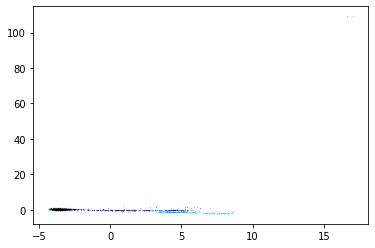

In [14]:
fig = plt.figure()
pca = PCA(n_components=2)
red_ch_data = pca.fit_transform(ch_data)


c = ['g','b','c','k','r']

fig, ax = plt.subplots()
for i in range(4):
        ax.scatter(red_ch_data[ch_anom_type_data_labels==(i+1)][:, 0], red_ch_data[ch_anom_type_data_labels==(i+1)][:, 1], s=0.01, c = c[i])
        


# Single Networks : 

## DT:

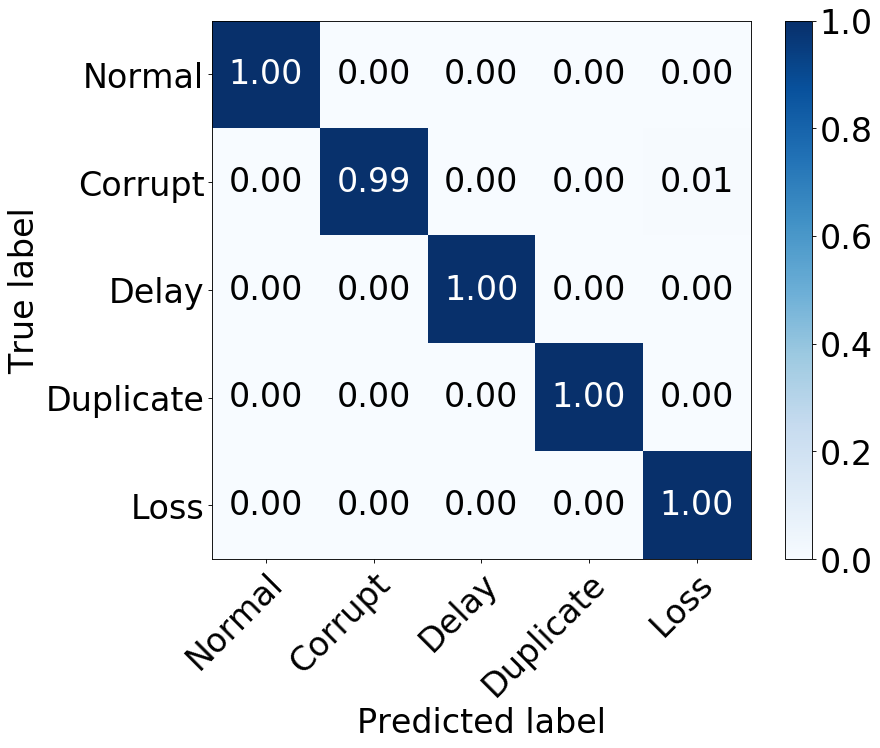

/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


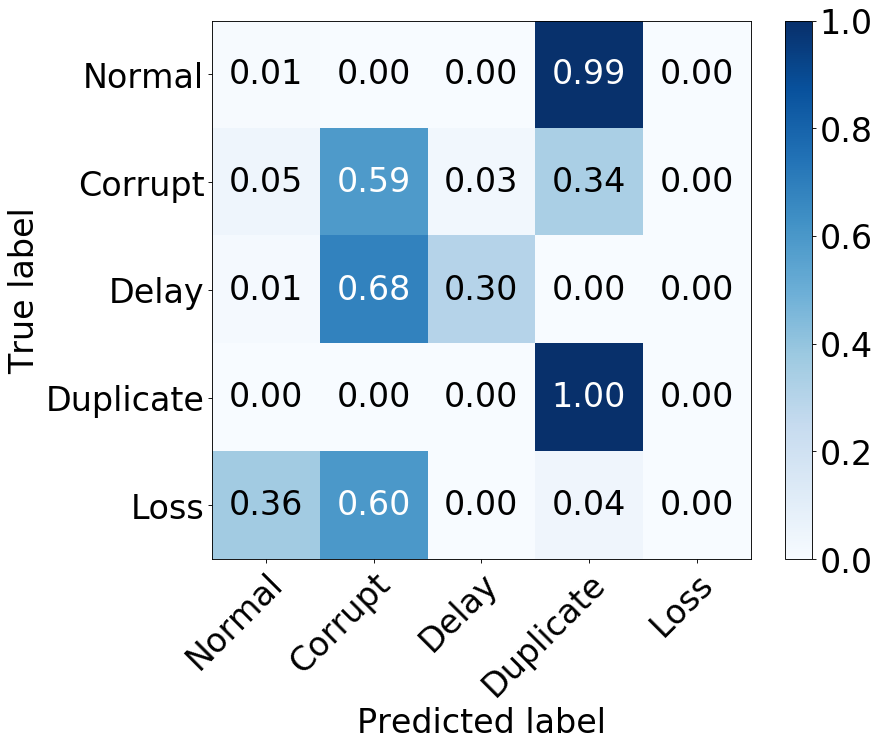

/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


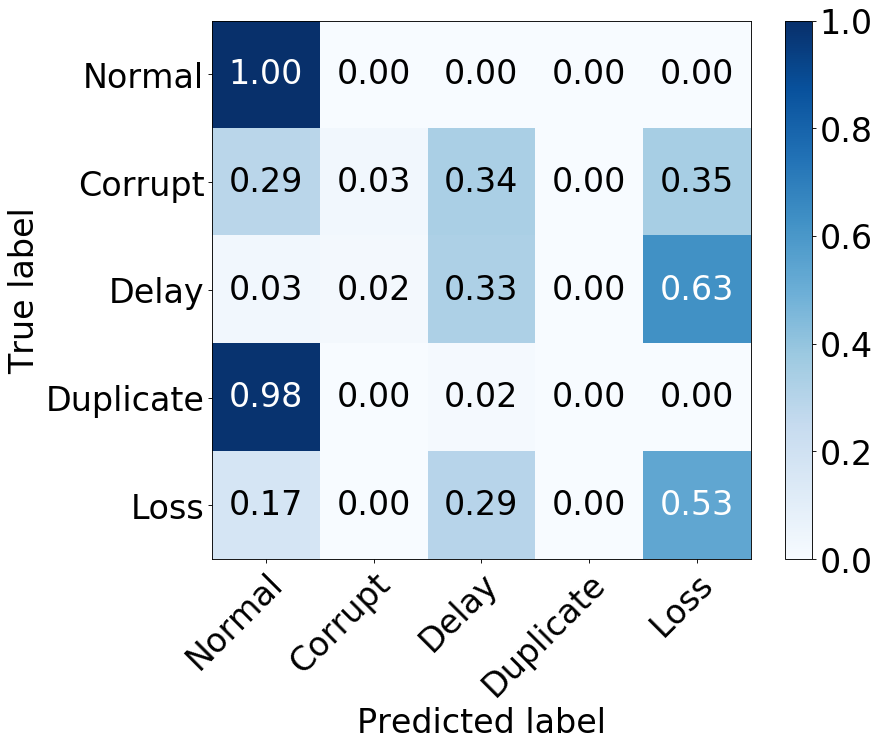

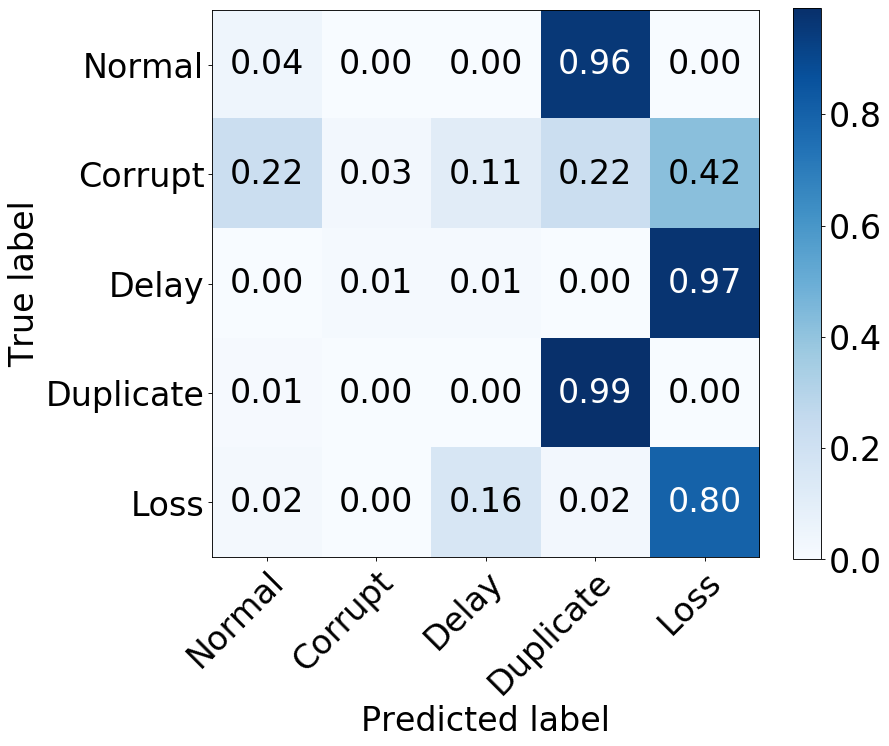

/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


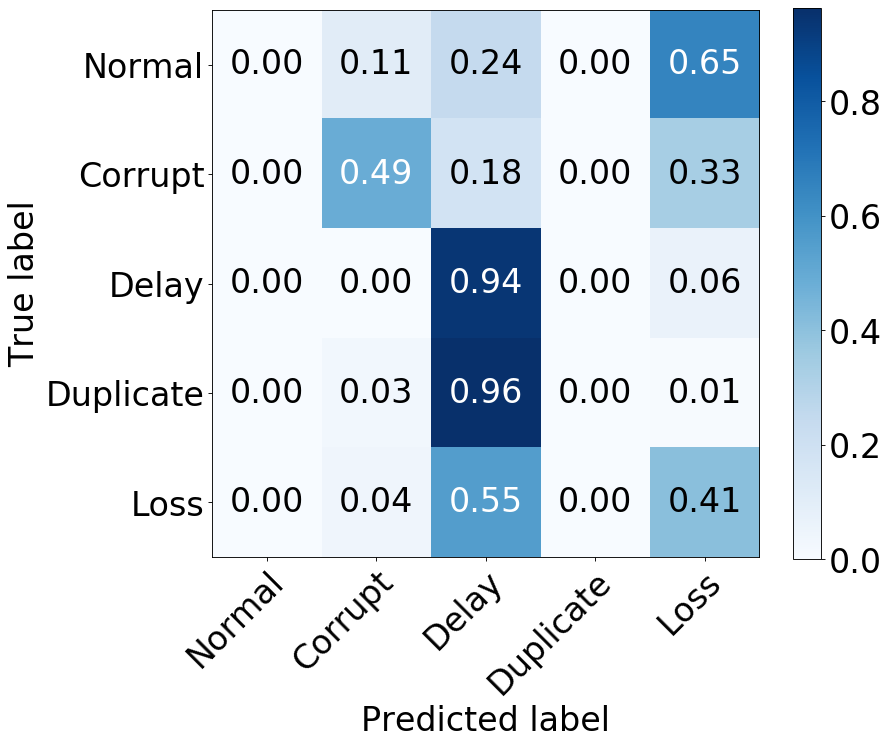

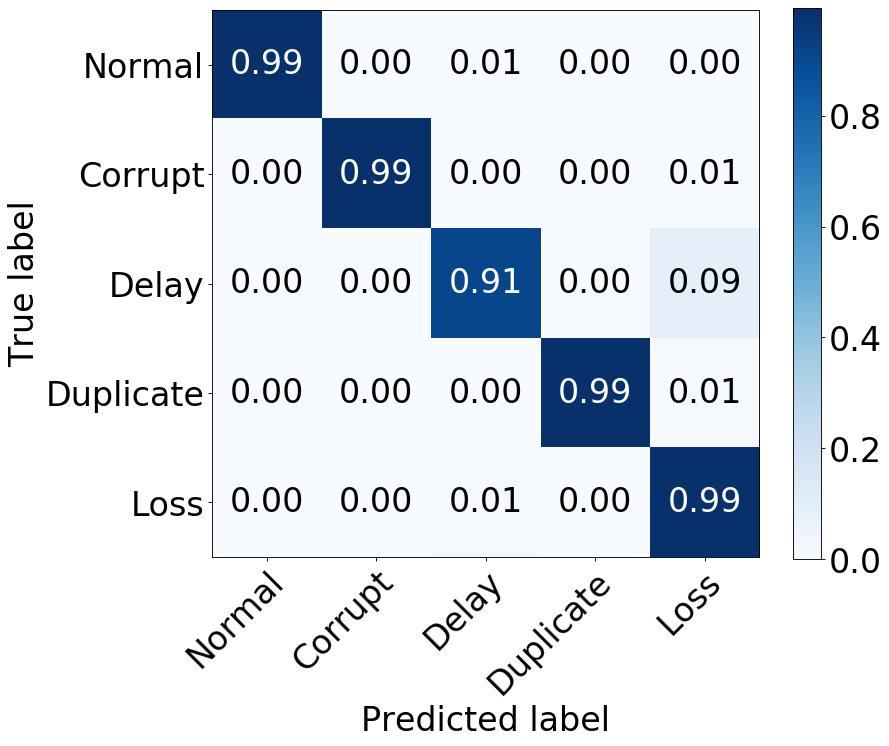

/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


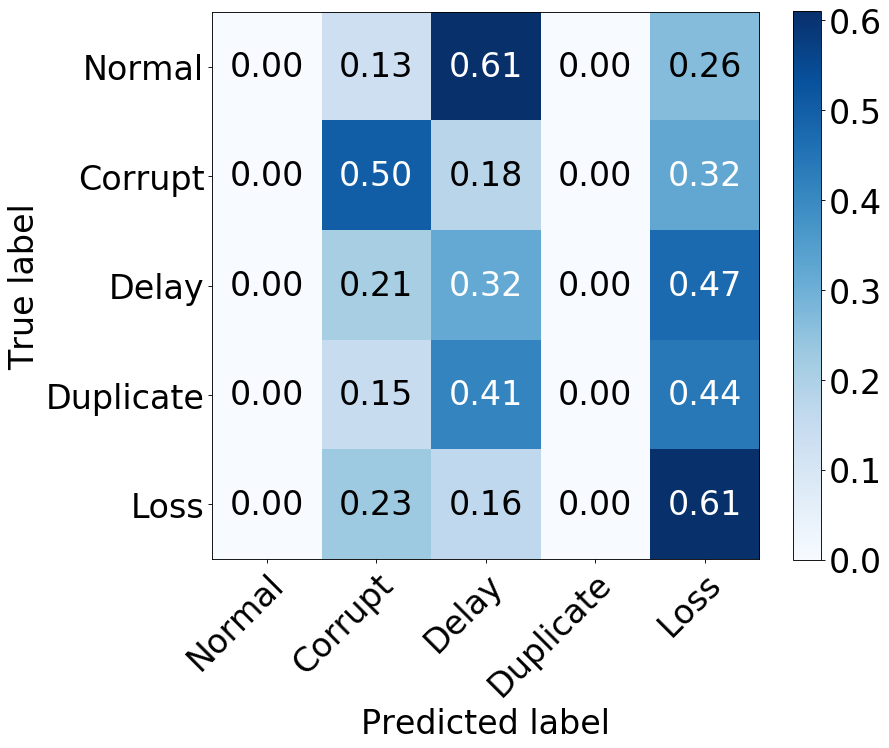

/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


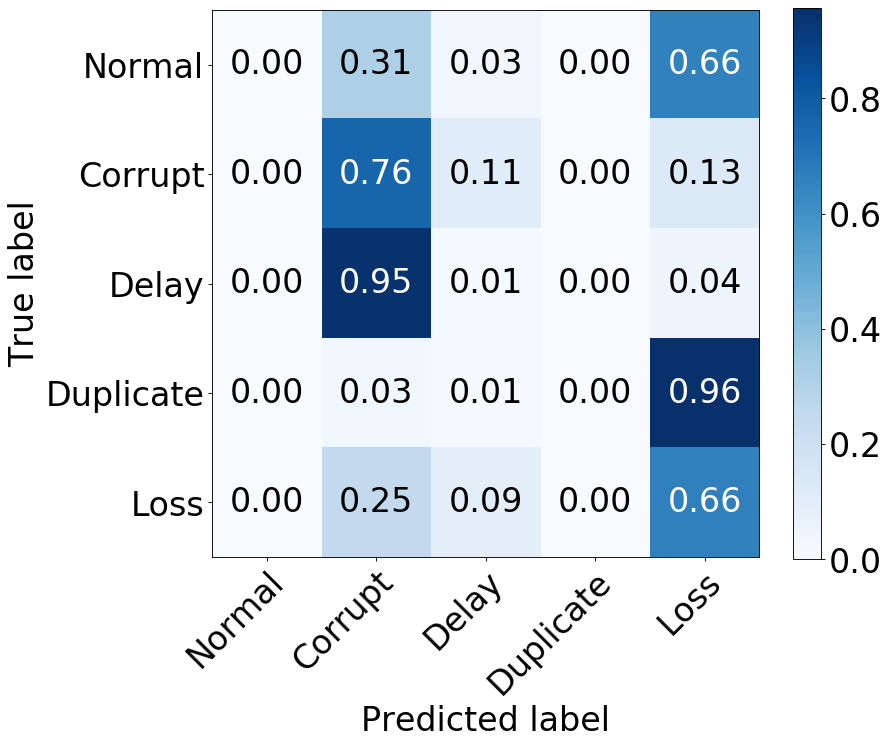

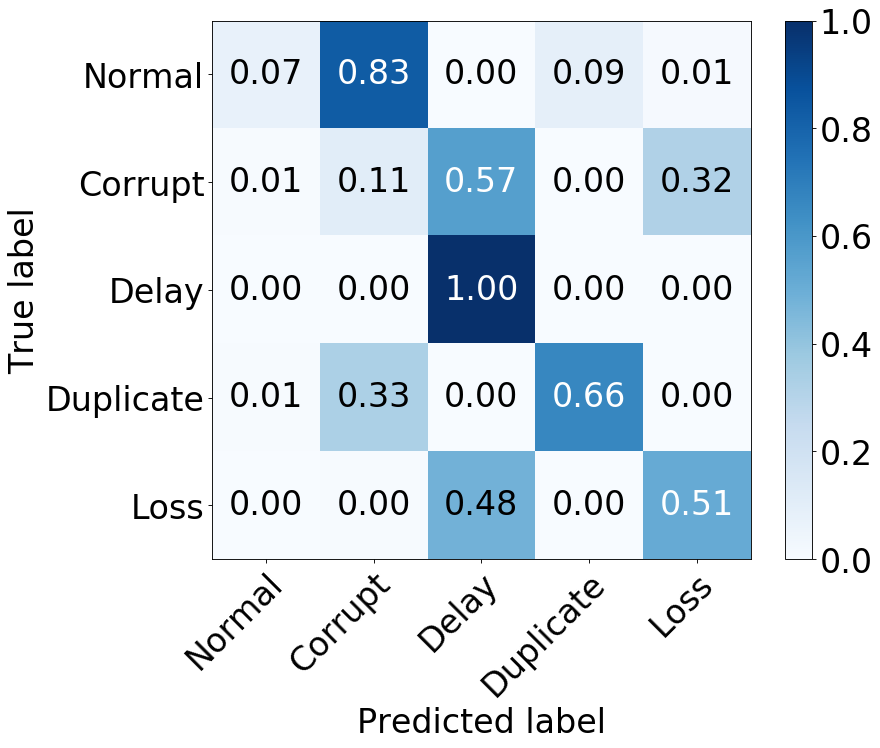

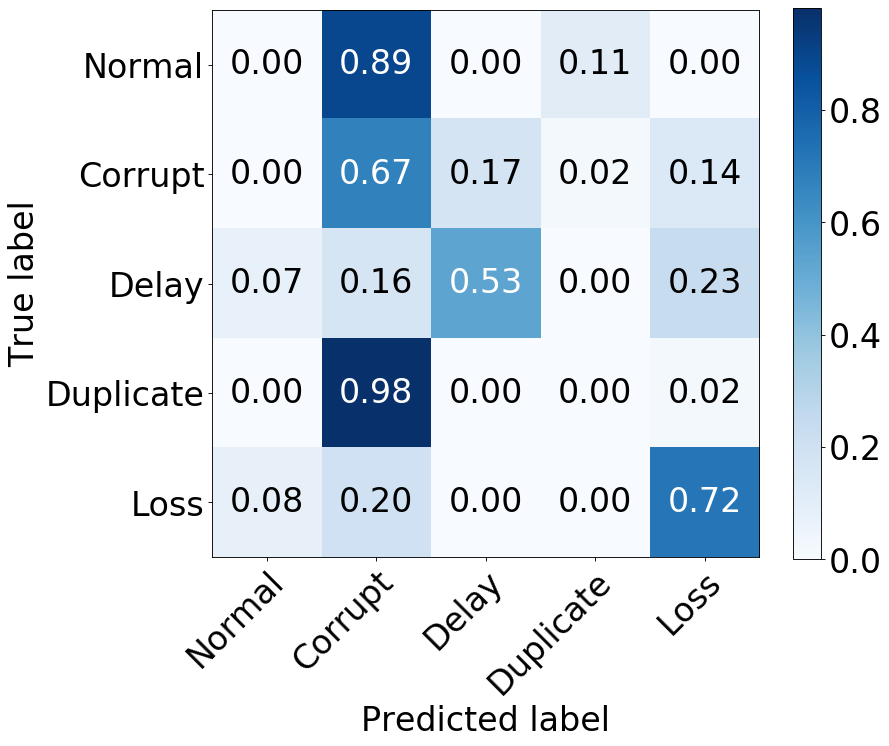

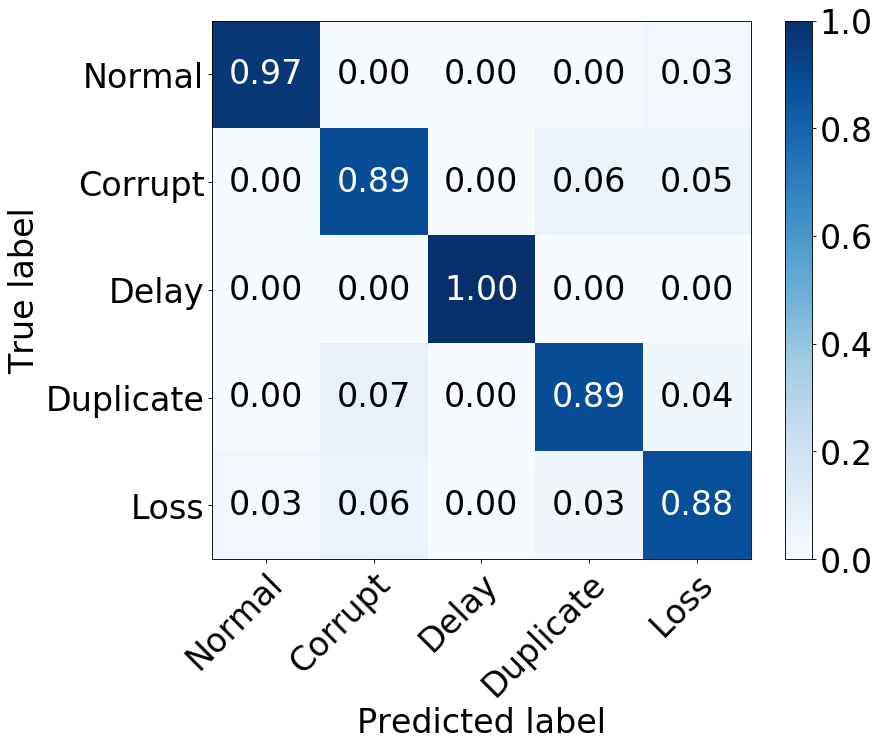

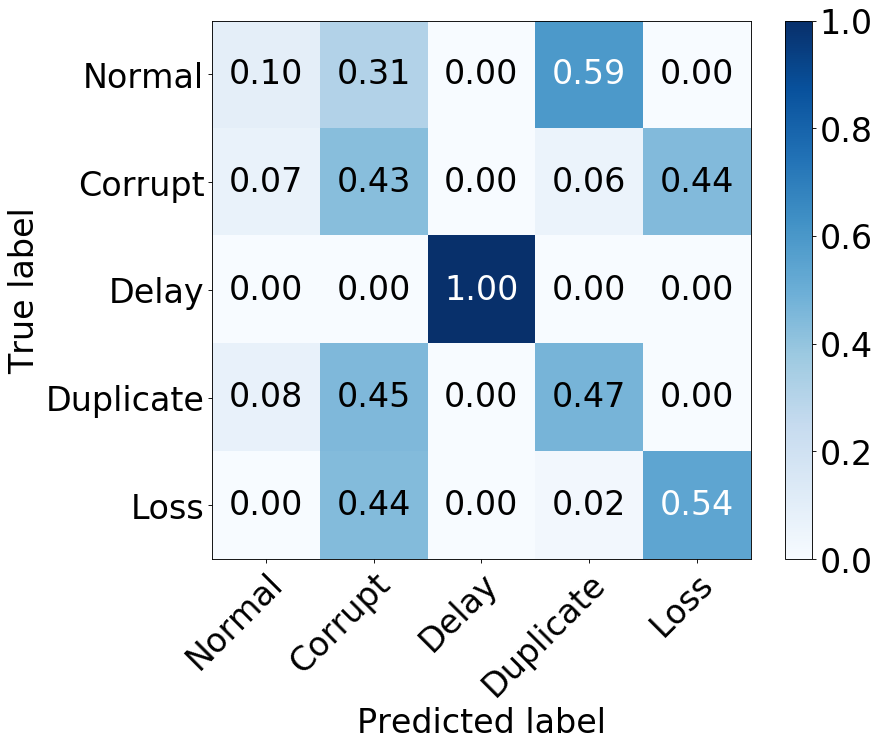

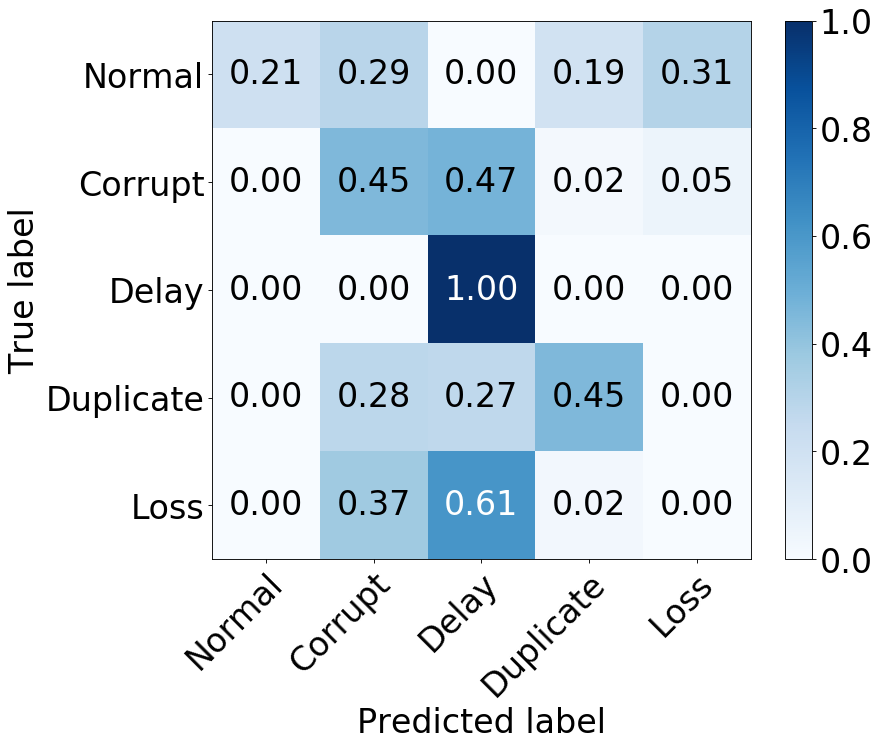

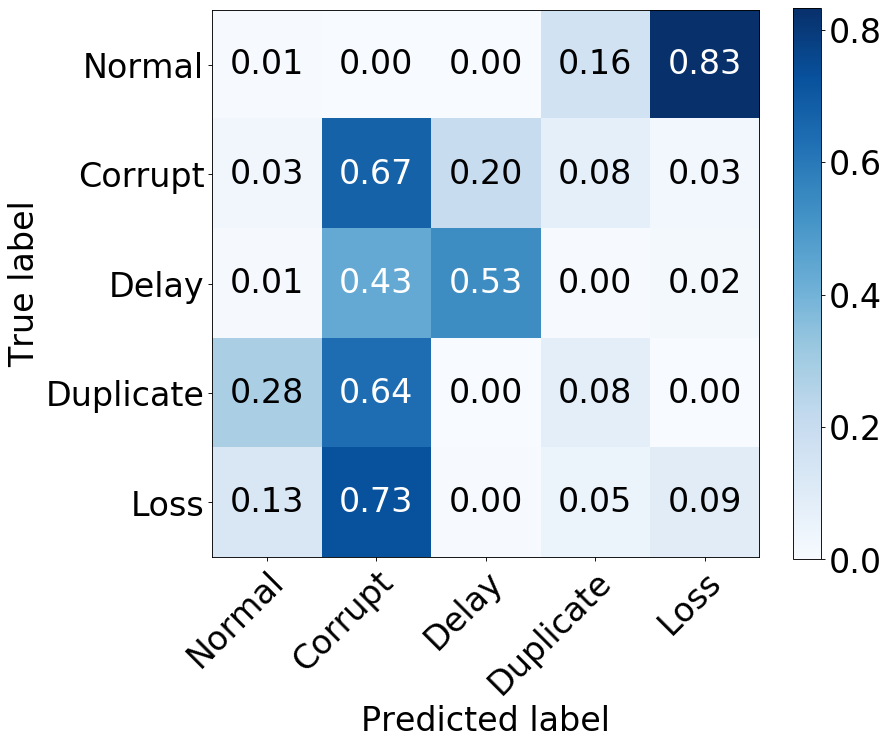

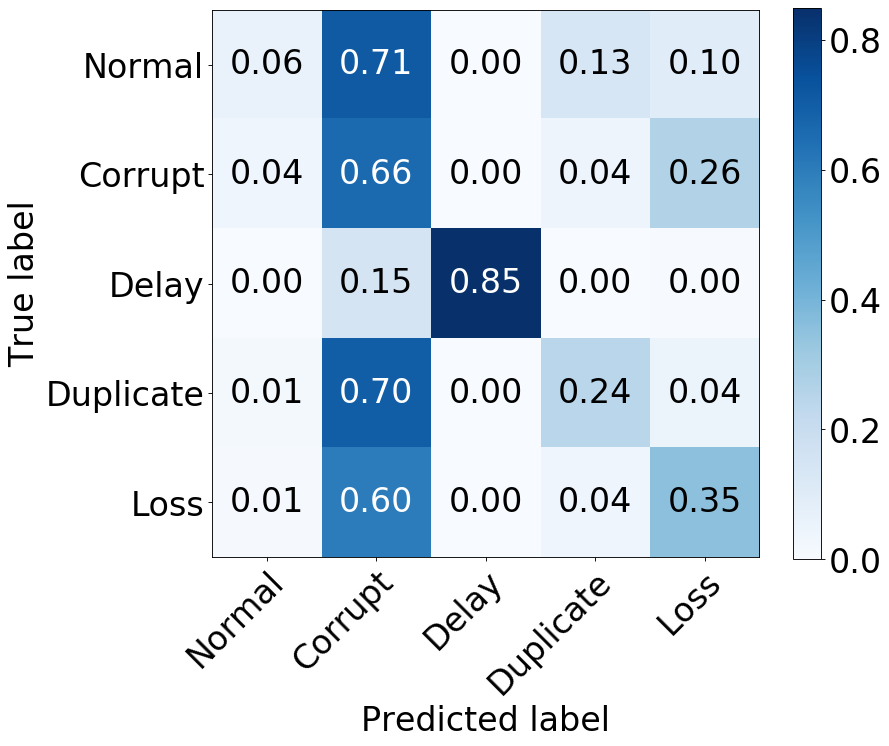

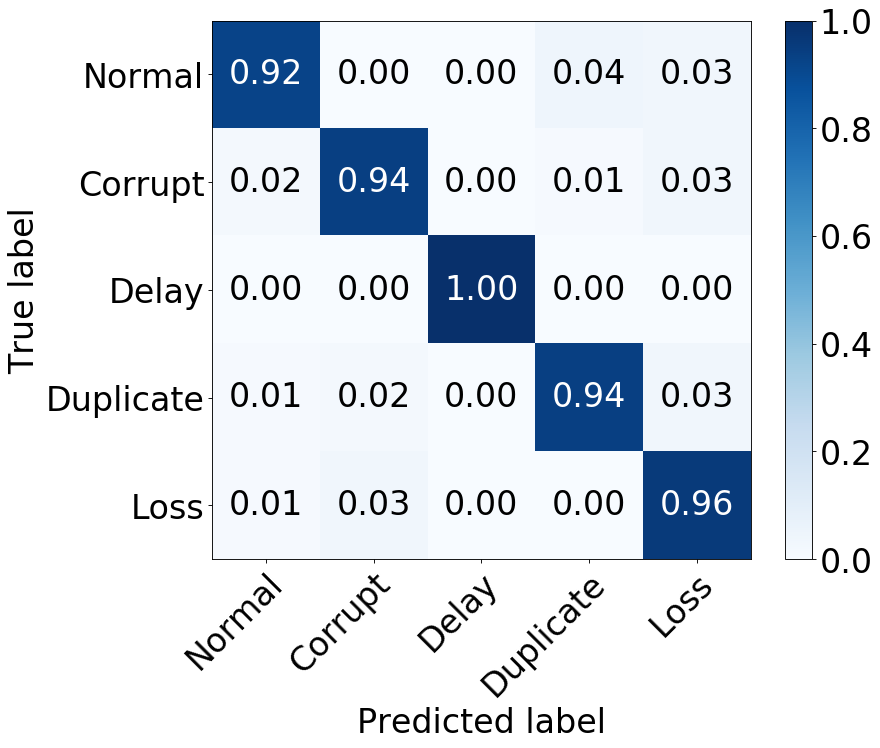

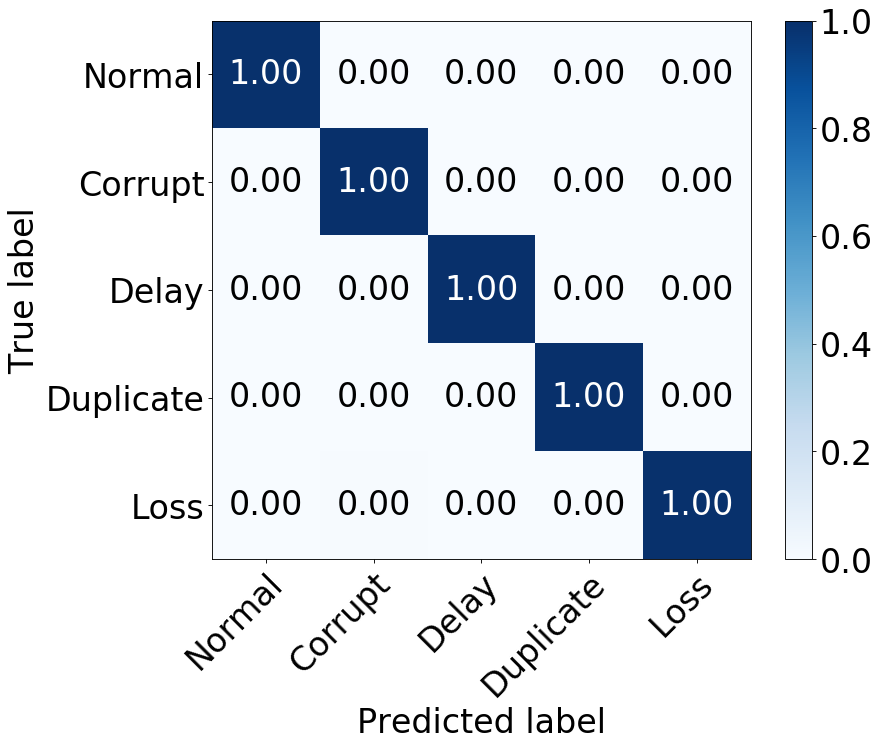

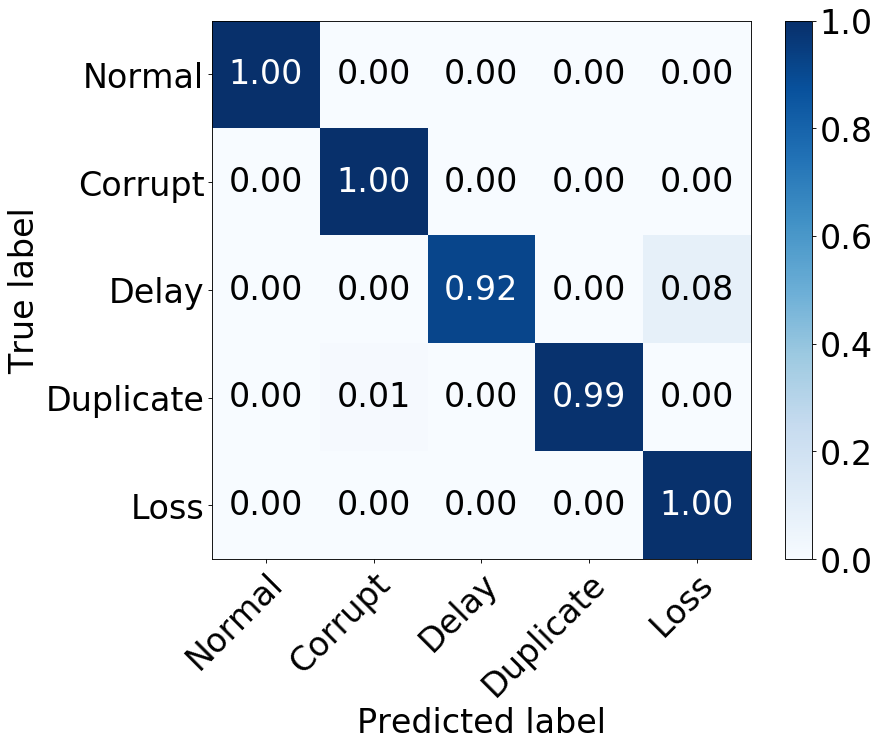

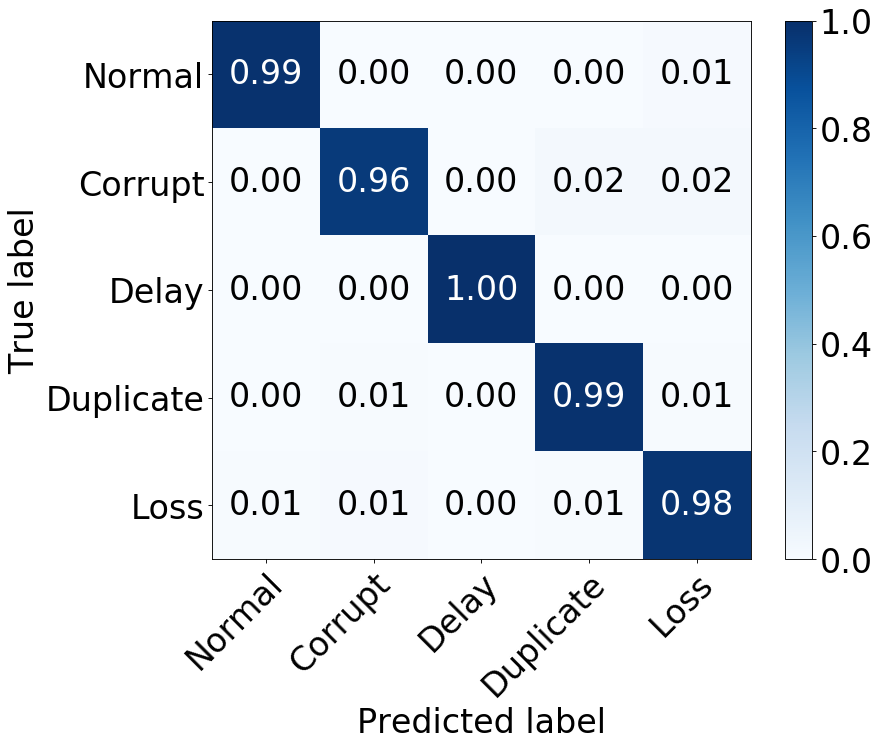

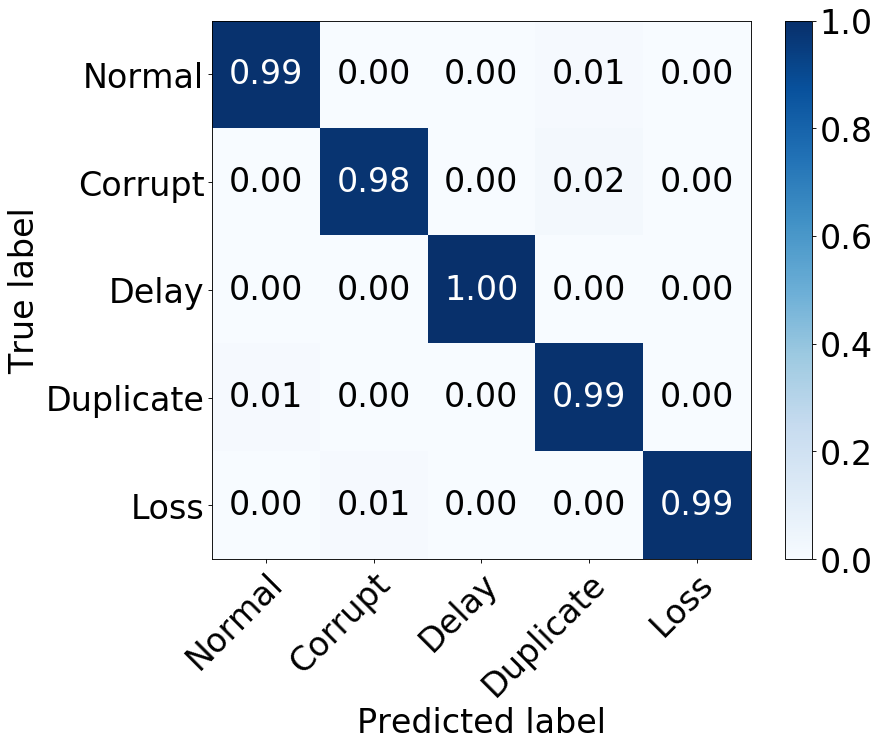

In [95]:
dtn =  DecisionTreeClassifier()
dtn.fit(dtn_train_data, dtn_train_labels)
dtn_predicted_labels = dtn.predict(dtn_test_data)
report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/DTN/dtn_model_dtn_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/DTN/dtn_model_dtn_data_DT.pdf')
plt.show()



hpc_predicted_labels = dtn.predict(hpc_test_data)
report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/DTN/dtn_model_hpc_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/DTN/dtn_model_hpc_data_DT.pdf')
plt.show()

emulab_predicted_labels = dtn.predict(emulab_test_data)
report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/DTN/dtn_model_emulab_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/DTN/dtn_model_emulab_data_DT.pdf')
plt.show()

ch_predicted_labels = dtn.predict(ch_test_data)
report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("DT/DTN/dtn_model_ch_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(ch_test_labels,ch_predicted_labels , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/DTN/dtn_model_ch_data_DT.pdf')
plt.show()



hpc =  DecisionTreeClassifier()
hpc.fit(hpc_train_data, hpc_train_labels)
dtn_predicted_labels = hpc.predict(dtn_test_data)
report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/HPC/hpc_model_dtn_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/HPC/hpc_model_dtn_data_DT.pdf')
plt.show()

hpc_predicted_labels = hpc.predict(hpc_test_data)
report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/HPC/hpc_model_hpc_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/HPC/hpc_model_hpc_data_DT.pdf')
plt.show()

emulab_predicted_labels = hpc.predict(emulab_test_data)
report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/HPC/hpc_model_emulab_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/HPC/hpc_model_emulab_data_DT.pdf')
plt.show()

ch_predicted_labels = hpc.predict(ch_test_data)
report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("DT/HPC/hpc_model_ch_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(ch_test_labels,ch_predicted_labels , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/HPC/hpc_model_ch_data_DT.pdf')
plt.show()



emulab = DecisionTreeClassifier()
emulab.fit(emulab_train_data, emulab_train_labels)
dtn_predicted_labels = emulab.predict(dtn_test_data)
report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/EMULAB/emulab_model_dtn_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/EMULAB/emulab_model_dtn_data_DT.pdf')
plt.show()

hpc_predicted_labels = emulab.predict(hpc_test_data)
# report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/EMULAB/emulab_model_hpc_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/EMULAB/emulab_model_hpc_data_DT.pdf')
plt.show()

emulab_predicted_labels = emulab.predict(emulab_test_data)
report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/EMULAB/emulab_model_emulab_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/EMULAB/emulab_model_emulab_data_DT.pdf')
plt.show()

ch_predicted_labels = emulab.predict(ch_test_data)
report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("DT/EMULAB/emulab_model_ch_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(ch_test_labels,ch_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/EMULAB/emulab_model_ch_data_DT.pdf')
plt.show()



ch = DecisionTreeClassifier()
ch.fit(ch_train_data, ch_train_labels)
dtn_predicted_labels = ch.predict(dtn_test_data)
report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/CH/ch_model_dtn_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/CH/ch_model_dtn_data_DT.pdf')
plt.show()

hpc_predicted_labels = ch.predict(hpc_test_data)
report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/CH/ch_model_hpc_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/CH/ch_model_hpc_data_DT.pdf')
plt.show()

emulab_predicted_labels = ch.predict(emulab_test_data)
report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/CH/ch_model_emulab_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/CH/ch_model_emulab_data_DT.pdf')
plt.show()

ch_predicted_labels = ch.predict(ch_test_data)
report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("DT/CH/ch_model_ch_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(ch_test_labels,ch_predicted_labels , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/CH/ch_model_ch_data_DT.pdf')
plt.show()



ch = DecisionTreeClassifier()
ch.fit(new_train_data, new_train_labels)
dtn_predicted_labels = ch.predict(dtn_test_data)
report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/ALL/combine_model_dtn_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/ALL/combine_model_dtn_data_DT.pdf')
plt.show()

hpc_predicted_labels = ch.predict(hpc_test_data)
report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/ALL/combine_model_hpc_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/ALL/combine_model_hpc_data_DT.pdf')
plt.show()

emulab_predicted_labels = ch.predict(emulab_test_data)
report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("DT/ALL/combine_model_emulab_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/ALL/combine_model_emulab_data_DT.pdf')
plt.show()

ch_predicted_labels = ch.predict(ch_test_data)
report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("DT/ALL/combine_model_ch_data_DT_CR.csv", sep='\t')
plot_confusion_matrix(ch_test_labels,ch_predicted_labels , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('DT/ALL/combine_model_ch_data_DT.pdf')
plt.show()



## Using SHAP values to inteperet the model

No handles with labels found to put in legend.


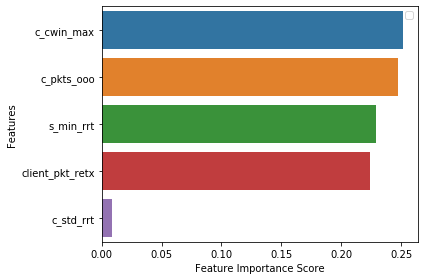

In [109]:

feature_imp = pd.Series(hpc.feature_importances_,index=data_field_labels).sort_values(ascending=False)[:5]
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("")
plt.legend()
plt.tight_layout()
plt.savefig('most_important_feature_DT.pdf')
plt.show()


# import shap
# shap.initjs()



# emulab_col = pd.DataFrame(data=emulab_train_data, 
#               columns=data_field_labels)

# # hpc_col = pd.DataFrame(data=hpc_test_data, 
# #               columns=data_field_labels)


# explainer = shap.TreeExplainer(emulab)
# shap_values = explainer.shap_values(emulab_col)
# shap.summary_plot(shap_values, emulab_col)
# # shap.summary_plot(shap_values[1], dtn_col,plot_type = "dot")
# # shap.summary_plot(shap_values[0], dtn_col,plot_type = "dot")
# # shap.dependence_plot("c_win_max", shap_values[1], dtn_col)



In [17]:
# print(dtn_col.iloc[1,:].shape)
# print(dtn.predict(dtn_col.iloc[93,:].values.reshape(1,89)))
# print(dtn_train_labels[85])
# print(dtn_col.iloc[85,:]["c_win_max"])
# print(dtn_col.iloc[85,:]["c_pkt_fs"])

# shap.force_plot(explainer.expected_value[0]
#                 , shap_values[0][93,:]
#                 , dtn_col.iloc[93,:], link="logit")

In [18]:

# shap.force_plot(explainer.expected_value[1]
#                 , shap_values[1][0:100]
#                 , dtn_col.iloc[0:100,:], link="logit")

In [19]:

# explainer = shap.TreeExplainer(dtn)
# shap_values = explainer.shap_values(hpc_col)
# shap.summary_plot(shap_values, hpc_col)
# shap.summary_plot(shap_values[1], hpc_col,plot_type = "dot")
# shap.summary_plot(shap_values[0], hpc_col,plot_type = "dot")

# shap.dependence_plot("c_win_max", shap_values[1], hpc_col)



In [20]:
# print(hpc_col.iloc[1,:].shape)
# print(dtn.predict(hpc_col.iloc[3,:].values.reshape(1,89)))
# print(hpc_test_labels[3])
# print(hpc_col.iloc[3,:]["c_win_max"])
# print(hpc_col.iloc[3,:]["c_pkt_fs"])

# shap.force_plot(explainer.expected_value[0]
#                 , shap_values[0][3,:]
#                 , hpc_col.iloc[3,:])

## Getting avg value of sum features which is important to decide classification :

In [21]:

# print((dtn_col[dtn_train_labels==2]["c_win_max"].mean))
# print((hpc_col[hpc_test_labels==1]["c_win_max"].mean))

# print((dtn_col[dtn_train_labels==1]["c_win_scl"].mean))
# print((hpc_col[hpc_test_labels==1]["c_win_scl"].mean))

## RF :

In [22]:
# dtn =  RandomForestClassifier(n_estimators = 1000, random_state = 42,n_jobs = -1)
# dtn.fit(dtn_train_data, dtn_train_labels)
# dtn_predicted_labels = dtn.predict(dtn_test_data)
# report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/DTN/dtn_model_dtn_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/DTN/dtn_model_dtn_data_RF.pdf')
# plt.show()

# hpc_predicted_labels = dtn.predict(hpc_test_data)
# report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/DTN/dtn_model_hpc_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/DTN/dtn_model_hpc_data_RF.pdf')
# plt.show()


# emulab_predicted_labels = dtn.predict(emulab_test_data)
# report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/DTN/dtn_model_emulab_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/DTN/dtn_model_emulab_data_RF.pdf')
# plt.show()


# ch_predicted_labels = dtn.predict(ch_test_data)
# report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/DTN/dtn_model_ch_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(ch_test_labels,ch_predicted_labels , normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/DTN/dtn_model_ch_data_RF.pdf')
# plt.show()




# hpc =  RandomForestClassifier(n_estimators = 1000, random_state = 42,n_jobs = -1)
# hpc.fit(hpc_train_data, hpc_train_labels)
# dtn_predicted_labels = hpc.predict(dtn_test_data)
# report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/HPC/hpc_model_dtn_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/HPC/hpc_model_dtn_data_RF.pdf')
# plt.show()

# hpc_predicted_labels = hpc.predict(hpc_test_data)
# report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/HPC/hpc_model_hpc_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/HPC/hpc_model_hpc_data_RF.pdf')
# plt.show()

# emulab_predicted_labels = hpc.predict(emulab_test_data)
# report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/HPC/hpc_model_emulab_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/HPC/hpc_model_emulab_data_RF.pdf')
# plt.show()

# ch_predicted_labels = hpc.predict(ch_test_data)
# report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/HPC/ch_model_ch_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(ch_test_labels,ch_predicted_labels , normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/HPC/ch_model_ch_data_RF.pdf')
# plt.show()





# emulab = RandomForestClassifier(n_estimators = 1000, random_state = 42,n_jobs = -1)
# emulab.fit(emulab_train_data, emulab_train_labels)
# dtn_predicted_labels = emulab.predict(dtn_test_data)
# report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/EMULAB/emulab_model_dtn_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/EMULAB/emulab_model_dtn_data_RF.pdf')
# plt.show()

# hpc_predicted_labels = emulab.predict(hpc_test_data)
# report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/EMULAB/emulab_model_hpc_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/EMULAB/emulab_model_hpc_data_RF.pdf')
# plt.show()

# emulab_predicted_labels = emulab.predict(emulab_test_data)
# report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/EMULAB/emulab_model_emulab_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/EMULAB/emulab_model_emulab_data_RF.pdf')
# plt.show()

# ch_predicted_labels = emulab.predict(ch_test_data)
# report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/EMULAB/ch_model_ch_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(ch_test_labels,ch_predicted_labels , normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/EMULAB/ch_model_ch_data_RF.pdf')
# plt.show()



# ch = DecisionTreeClassifier()
# ch.fit(ch_train_data, ch_train_labels)
# dtn_predicted_labels = ch.predict(dtn_test_data)
# report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/CH/ch_model_dtn_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/CH/ch_model_dtn_data_RF.pdf')
# plt.show()

# hpc_predicted_labels = ch.predict(hpc_test_data)
# report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/CH/ch_model_hpc_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/CH/ch_model_hpc_data_RF.pdf')
# plt.show()

# emulab_predicted_labels = ch.predict(emulab_test_data)
# report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/CH/ch_model_emulab_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/CH/ch_model_emulab_data_RF.pdf')
# plt.show()

# ch_predicted_labels = ch.predict(ch_test_data)
# report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/CH/ch_model_ch_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(ch_test_labels,ch_predicted_labels , normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/CH/ch_model_ch_data_RF.pdf')
# plt.show()




# ch = DecisionTreeClassifier()
# ch.fit(new_train_data, new_train_labels)
# dtn_predicted_labels = ch.predict(dtn_test_data)
# report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/ALL/combine_model_dtn_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/ALL/combine_model_dtn_data_RF.pdf')
# plt.show()

# hpc_predicted_labels = ch.predict(hpc_test_data)
# report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/ALL/combine_model_hpc_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/ALL/combine_model_hpc_data_RF.pdf')
# plt.show()

# emulab_predicted_labels = ch.predict(emulab_test_data)
# report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/ALL/combine_model_emulab_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/ALL/combine_model_emulab_data_RF.pdf')
# plt.show()

# ch_predicted_labels = ch.predict(ch_test_data)
# report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
# df = pd.DataFrame(report).transpose()
# df.to_csv("RF/ALL/combine_model_ch_data_RF_CR.csv", sep='\t')
# plot_confusion_matrix(ch_test_labels,ch_predicted_labels , normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('RF/ALL/combine_model_ch_data_RF.pdf')
# plt.show()

## SVM :

In [23]:


# dtn = svm.SVC(kernel='linear', gamma ='auto', max_iter=10000)
# dtn.fit(dtn_train_data, dtn_train_labels)
# dtn_predicted_labels = dtn.predict(dtn_test_data)
# report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/DTN/dtn_model_dtn_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/DTN/dtn_model_dtn_data_SVM.pdf')
# plt.show()

# hpc_predicted_labels = dtn.predict(hpc_test_data)
# report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/DTN/dtn_model_hpc_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/DTN/dtn_model_hpc_data_SVM.pdf')
# plt.show()


# emulab_predicted_labels = dtn.predict(emulab_test_data)
# report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/DTN/dtn_model_emulab_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/DTN/dtn_model_emulab_data_SVM.pdf')
# plt.show()


# ch_predicted_labels = dtn.predict(ch_test_data)
# report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/DTN/dtn_model_ch_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(ch_test_labels,ch_predicted_labels , normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/DTN/dtn_model_ch_data_SVM.pdf')
# plt.show()




# hpc = svm.SVC(kernel='linear', gamma ='auto', max_iter=10000)
# hpc.fit(hpc_train_data, hpc_train_labels)
# dtn_predicted_labels = hpc.predict(dtn_test_data)
# report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/HPC/hpc_model_dtn_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/HPC/hpc_model_dtn_data_SVM.pdf')
# plt.show()

# hpc_predicted_labels = hpc.predict(hpc_test_data)
# report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/HPC/hpc_model_hpc_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/HPC/hpc_model_hpc_data_SVM.pdf')
# plt.show()

# emulab_predicted_labels = hpc.predict(emulab_test_data)
# report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/HPC/hpc_model_emulab_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/HPC/hpc_model_emulab_data_SVM.pdf')
# plt.show()

# ch_predicted_labels = hpc.predict(ch_test_data)
# report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/HPC/ch_model_ch_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(ch_test_labels,ch_predicted_labels , normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/HPC/ch_model_ch_data_SVM.pdf')
# plt.show()





# emulab = svm.SVC(kernel='linear', gamma ='auto', max_iter=10000)
# emulab.fit(emulab_train_data, emulab_train_labels)
# dtn_predicted_labels = emulab.predict(dtn_test_data)
# report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/EMULAB/emulab_model_dtn_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/EMULAB/emulab_model_dtn_data_SVM.pdf')
# plt.show()

# hpc_predicted_labels = emulab.predict(hpc_test_data)
# report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/EMULAB/emulab_model_hpc_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/EMULAB/emulab_model_hpc_data_SVM.pdf')
# plt.show()

# emulab_predicted_labels = emulab.predict(emulab_test_data)
# report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/EMULAB/emulab_model_emulab_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/EMULAB/emulab_model_emulab_data_SVM.pdf')
# plt.show()

# ch_predicted_labels = emulab.predict(ch_test_data)
# report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/EMULAB/ch_model_ch_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(ch_test_labels,ch_predicted_labels , normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/EMULAB/ch_model_ch_data_SVM.pdf')
# plt.show()



# ch = svm.SVC(kernel='linear', gamma ='auto', max_iter=10000)
# ch.fit(ch_train_data, ch_train_labels)
# dtn_predicted_labels = ch.predict(dtn_test_data)
# report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/CH/ch_model_dtn_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/CH/ch_model_dtn_data_SVM.pdf')
# plt.show()

# hpc_predicted_labels = ch.predict(hpc_test_data)
# report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/CH/ch_model_hpc_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/CH/ch_model_hpc_data_SVM.pdf')
# plt.show()

# emulab_predicted_labels = ch.predict(emulab_test_data)
# report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/CH/ch_model_emulab_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/CH/ch_model_emulab_data_SVM.pdf')
# plt.show()

# ch_predicted_labels = ch.predict(ch_test_data)
# report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/CH/ch_model_ch_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(ch_test_labels,ch_predicted_labels , normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/CH/ch_model_ch_data_SVM.pdf')
# plt.show()



# ch = svm.SVC(kernel='linear', gamma ='auto', max_iter=10000)
# ch.fit(new_train_data, new_train_labels)
# dtn_predicted_labels = ch.predict(dtn_test_data)
# report = classification_report(dtn_test_labels, dtn_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/ALL/combine_model_dtn_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(dtn_test_labels, dtn_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/ALL/combine_model_dtn_data_SVM.pdf')
# plt.show()

# hpc_predicted_labels = ch.predict(hpc_test_data)
# report = classification_report(hpc_test_labels, hpc_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/ALL/combine_model_hpc_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(hpc_test_labels, hpc_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/ALL/combine_model_hpc_data_SVM.pdf')
# plt.show()

# emulab_predicted_labels = ch.predict(emulab_test_data)
# report = classification_report(emulab_test_labels, emulab_predicted_labels, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/ALL/combine_model_emulab_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(emulab_test_labels, emulab_predicted_labels, normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/ALL/combine_model_emulab_data_SVM.pdf')
# plt.show()

# ch_predicted_labels = ch.predict(ch_test_data)
# report = classification_report(ch_test_labels,ch_predicted_labels, output_dict=True )
# df = pd.DataFrame(report).transpose()
# df.to_csv("SVM/ALL/combine_model_ch_data_SVM_CR.csv", sep='\t')
# plot_confusion_matrix(ch_test_labels,ch_predicted_labels , normalize=True,classes=class_names, title='')
# plt.rcParams.update({'font.size': 30})
# plt.savefig('SVM/ALL/combine_model_ch_data_SVM.pdf')
# plt.show()






## NN :

Train on 1448 samples, validate on 362 samples
Epoch 1/10
1448/1448 [==============================] - 0s 238us/step - loss: 0.8432 - accuracy: 0.6713 - val_loss: 0.3437 - val_accuracy: 0.9033
Epoch 2/10
1448/1448 [==============================] - 0s 112us/step - loss: 0.4111 - accuracy: 0.8674 - val_loss: 0.1992 - val_accuracy: 0.9475
Epoch 3/10
1448/1448 [==============================] - 0s 89us/step - loss: 0.3151 - accuracy: 0.8950 - val_loss: 0.2530 - val_accuracy: 0.9392
Epoch 4/10
1448/1448 [==============================] - 0s 71us/step - loss: 0.2787 - accuracy: 0.9075 - val_loss: 0.2396 - val_accuracy: 0.9227
Epoch 5/10
1448/1448 [==============================] - 0s 69us/step - loss: 0.2609 - accuracy: 0.9151 - val_loss: 0.1905 - val_accuracy: 0.9530
Epoch 6/10
1448/1448 [==============================] - 0s 69us/step - loss: 0.2333 - accuracy: 0.9199 - val_loss: 0.2332 - val_accuracy: 0.9171
Epoch 7/10
1448/1448 [==============================] - 0s 69us/step - loss: 0.22

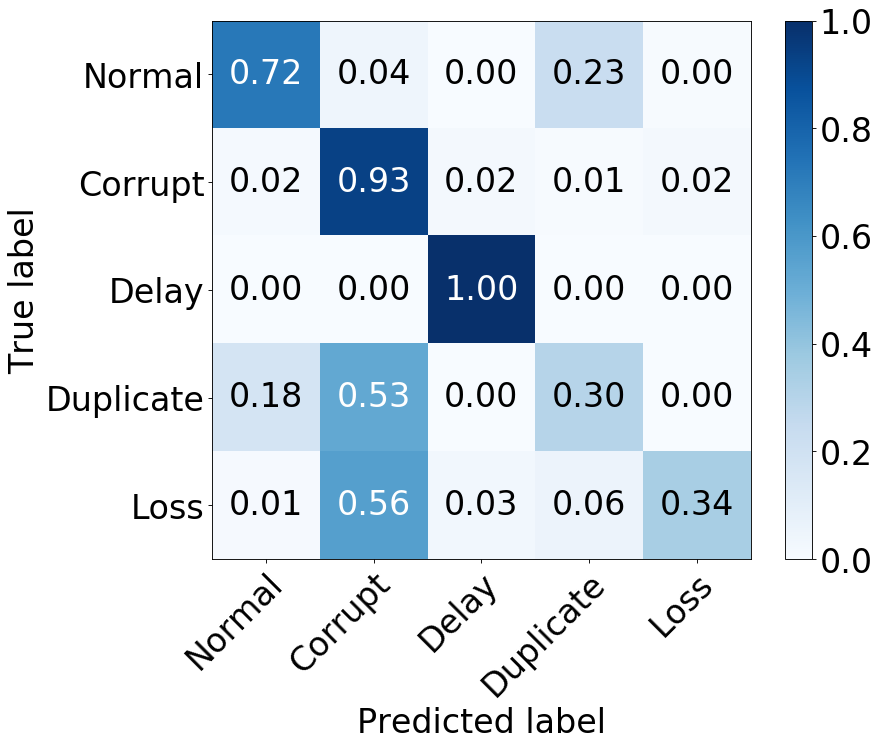

In [69]:
# create model
model = None
model = Sequential()

#get number of columns in training data
n_cols = dtn_train_data.shape[1]

model.add(Dense(300, activation='relu', input_dim=n_cols))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=3)

ch_train_labels_cat = to_categorical(ch_train_labels)
emulab_train_labels_cat = to_categorical(emulab_train_labels)


model.fit(ch_train_data, ch_train_labels_cat, validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])
# # model.fit(hpc_train_data[:10], hpc_train_labels_cat[:10], validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])
# model.fit(emulab_train_data[110:120], emulab_train_labels_cat[110:120], validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])



dtn_predicted_labels = model.predict(dtn_test_data)
plot_confusion_matrix(dtn_test_labels, np.argmax(dtn_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/CH/ch_model_dtn_data_NN.pdf')
plt.show()
report = classification_report(dtn_test_labels, np.argmax(dtn_predicted_labels, axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("NN/CH/ch_model_dtn_data_NN_CR.csv", sep='\t')



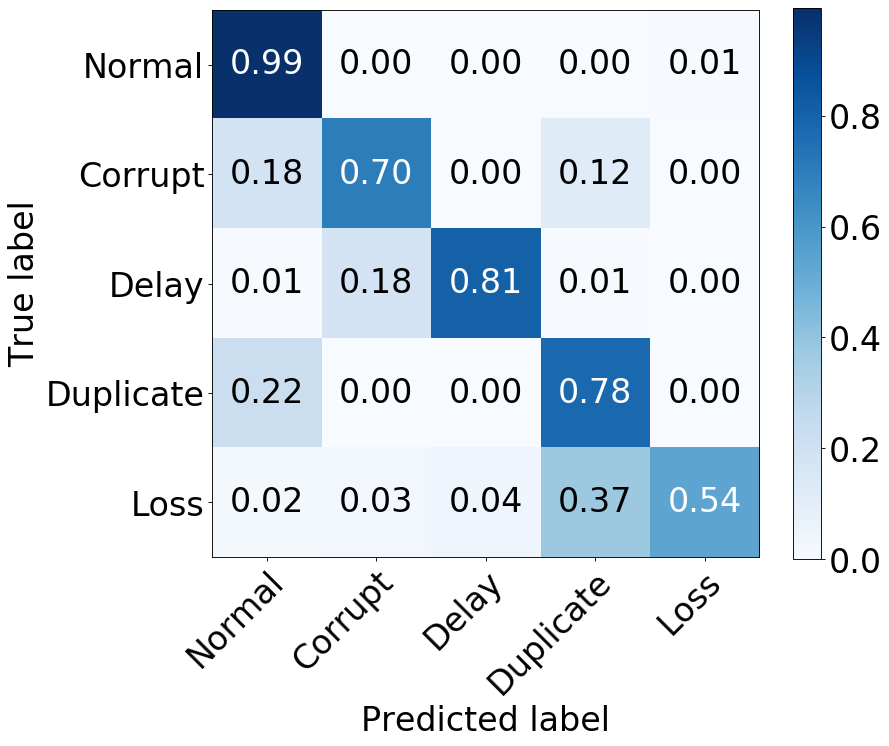

In [60]:

hpc_predicted_labels = model.predict(hpc_test_data)
report = classification_report(hpc_test_labels, np.argmax(hpc_predicted_labels, axis=1), output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("NN/CH/ch_model_hpc_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(hpc_test_labels, np.argmax(hpc_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/CH/ch_model_hpc_data_NN.pdf')
plt.show()


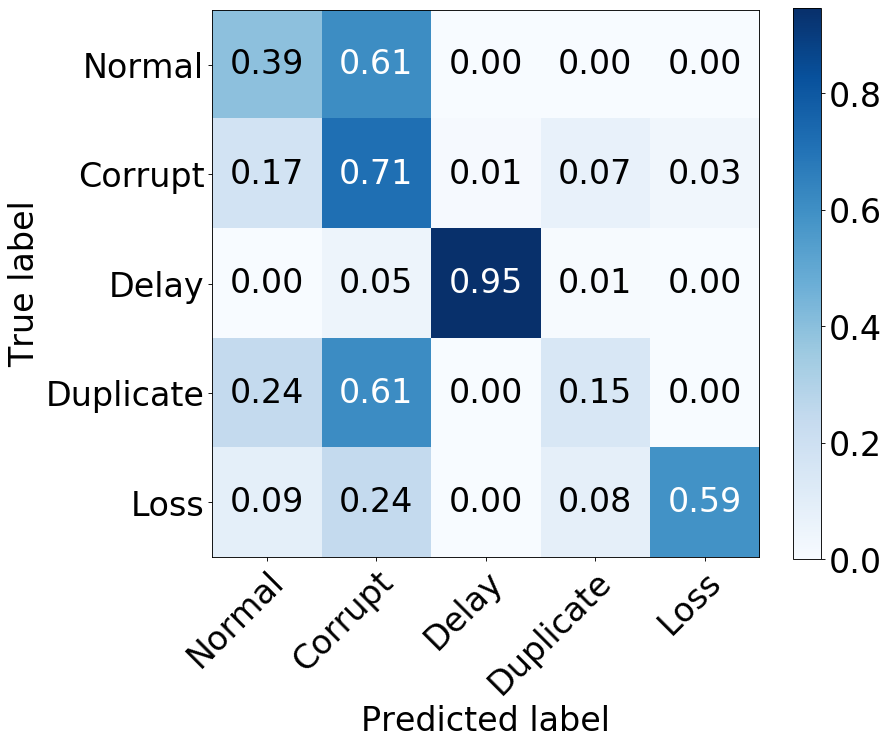

In [70]:

emulab_predicted_labels = model.predict(emulab_test_data)
report = classification_report(emulab_test_labels, np.argmax(emulab_predicted_labels, axis=1), output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("NN/CH/ch_model_emulab_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(emulab_test_labels, np.argmax(emulab_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/CH/ch_model_emulab_data_NN.pdf')
plt.show()





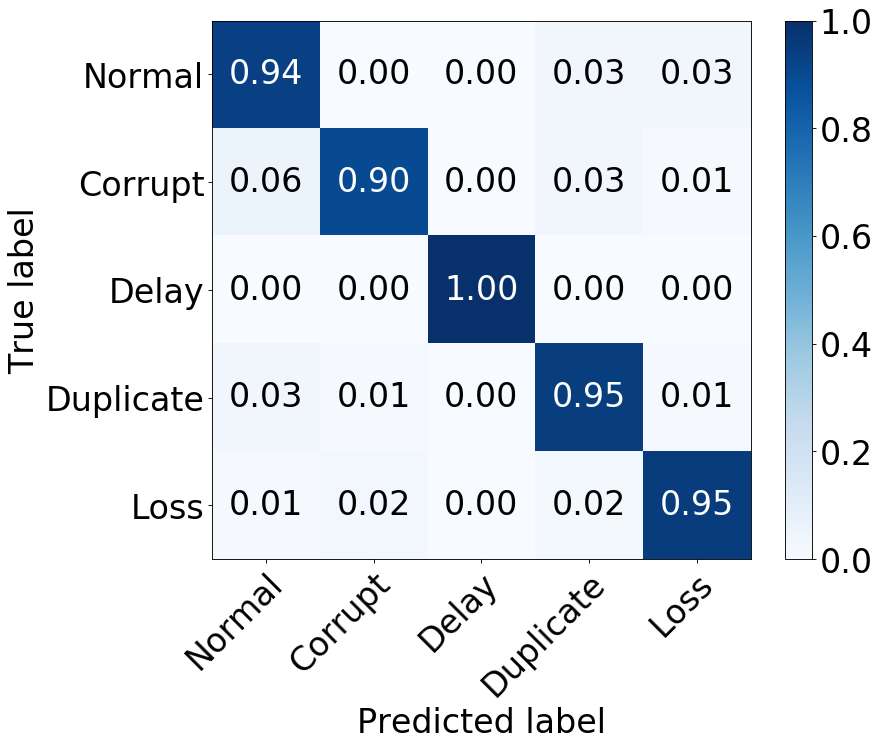

In [62]:

ch_predicted_labels = model.predict(ch_test_data)
report = classification_report(ch_test_labels, np.argmax(ch_predicted_labels, axis=1), output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("NN/CH/ch_model_ch_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(ch_test_labels, np.argmax(ch_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/CH/ch_model_ch_data_NN.pdf')
plt.show()



Train on 14228 samples, validate on 3557 samples
Epoch 1/10
14228/14228 [==============================] - 6s 433us/step - loss: 0.3667 - accuracy: 0.8776 - val_loss: 0.1070 - val_accuracy: 0.9680
Epoch 2/10
14228/14228 [==============================] - 6s 421us/step - loss: 0.2552 - accuracy: 0.9126 - val_loss: 0.1191 - val_accuracy: 0.9685
Epoch 3/10
14228/14228 [==============================] - 6s 417us/step - loss: 0.2372 - accuracy: 0.9191 - val_loss: 0.0995 - val_accuracy: 0.9680
Epoch 4/10
14228/14228 [==============================] - 6s 419us/step - loss: 0.2201 - accuracy: 0.9249 - val_loss: 0.0902 - val_accuracy: 0.9705
Epoch 5/10
14228/14228 [==============================] - 6s 417us/step - loss: 0.2140 - accuracy: 0.9226 - val_loss: 0.1013 - val_accuracy: 0.9680
Epoch 6/10
14228/14228 [==============================] - 6s 419us/step - loss: 0.2199 - accuracy: 0.9219 - val_loss: 0.1134 - val_accuracy: 0.9671
Epoch 7/10
14228/14228 [==============================] - 6s 41

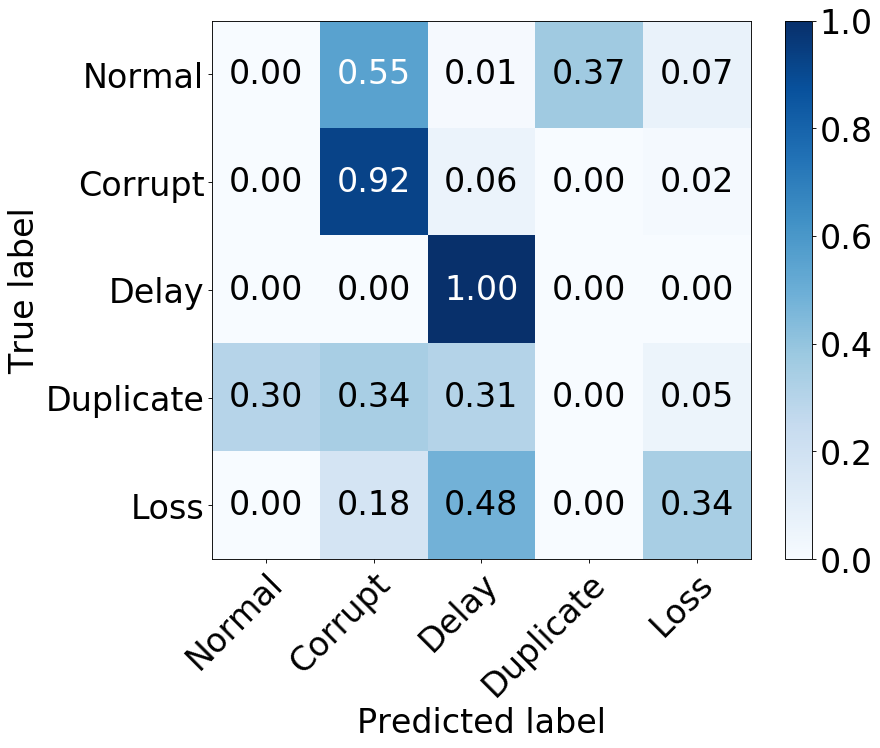

In [94]:
emulab_train_labels_cat = to_categorical(emulab_train_labels)


# create model
model = Sequential()

#get number of columns in training data
n_cols = dtn_train_data.shape[1]

model.add(Dense(1700, activation='relu', input_dim=n_cols))
model.add(Dropout(0.05))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=3)

#K.clear_session()
model.fit(emulab_train_data, emulab_train_labels_cat, validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])
# model.fit(dtn_train_data[:15], dtn_train_labels_cat[:15], validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])


#model.fit(dtn_train_data[:250][dtn_train_labels_cat[:250].argmax(axis=1) == 1][0:5], dtn_train_labels_cat[:250][dtn_train_labels_cat[:250].argmax(axis=1) == 1][0:5], validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])
# model.fit(dtn_train_data[:250][dtn_train_labels_cat[:250].argmax(axis=1) == 2][0:15], dtn_train_labels_cat[:250][dtn_train_labels_cat[:250].argmax(axis=1) == 2][0:15], validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])
# model.fit(dtn_train_data[:250][dtn_train_labels_cat[:250].argmax(axis=1) == 3][0:15], dtn_train_labels_cat[:250][dtn_train_labels_cat[:250].argmax(axis=1) == 3][0:15], validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])
# model.fit(dtn_train_data[:250][dtn_train_labels_cat[:250].argmax(axis=1) == 4][0:15], dtn_train_labels_cat[:250][dtn_train_labels_cat[:250].argmax(axis=1) == 4][0:15], validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])
# model.fit(dtn_train_data[:250][dtn_train_labels_cat[:250].argmax(axis=1) == 5][0:15], dtn_train_labels_cat[:250][dtn_train_labels_cat[:250].argmax(axis=1) == 5][0:15], validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])


dtn_predicted_labels = model.predict(dtn_test_data)
report = classification_report(dtn_test_labels,  np.argmax(dtn_predicted_labels, axis=1), output_dict=True  )
df = pd.DataFrame(report).transpose()
df.to_csv("NN/EMULAB/emulab_model_dtn_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(dtn_test_labels, np.argmax(dtn_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/EMULAB/emulab_model_dtn_data_NN.pdf')
plt.show()


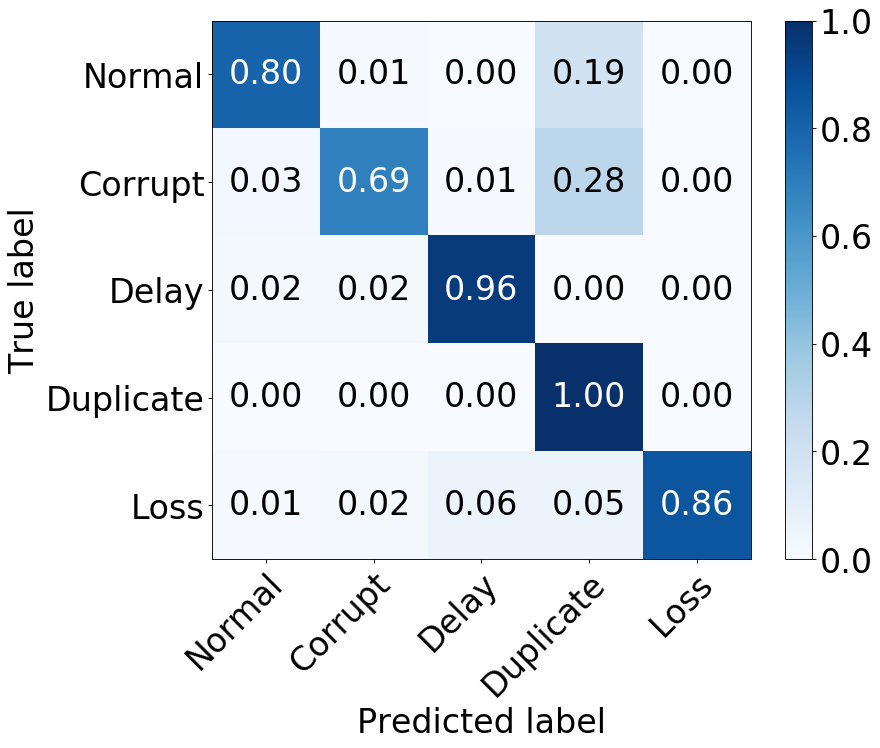

In [29]:

hpc_predicted_labels = model.predict(hpc_test_data)
report = classification_report(hpc_test_labels,  np.argmax(hpc_predicted_labels, axis=1) , output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("NN/EMULAB/emulab_model_hpc_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(hpc_test_labels, np.argmax(hpc_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/EMULAB/emulab_model_hpc_data_NN.pdf')
plt.show()


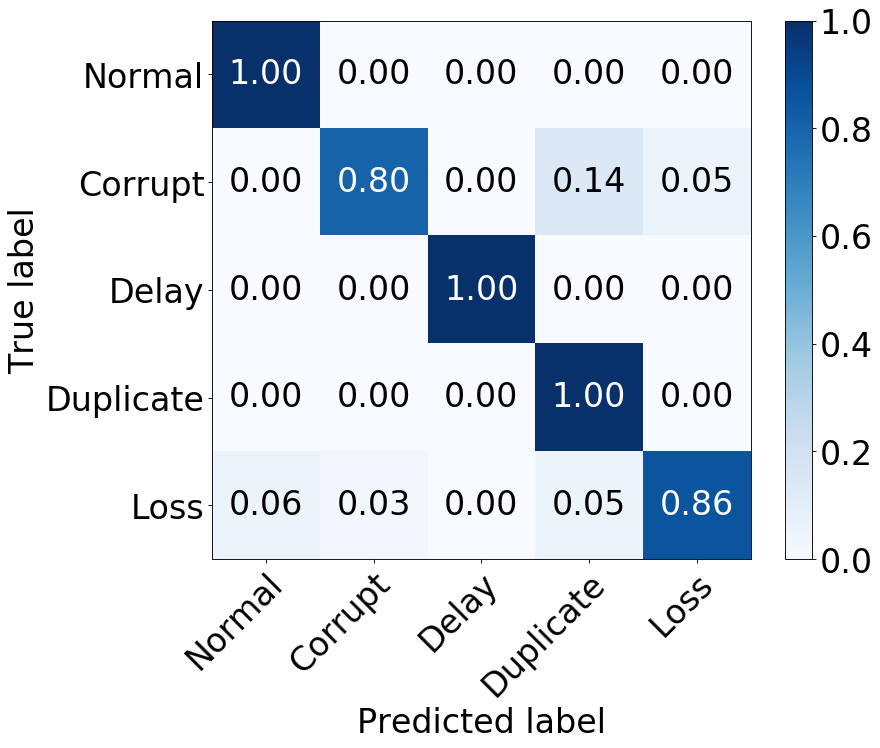

In [30]:

emulab_predicted_labels = model.predict(emulab_test_data)
report = classification_report(emulab_test_labels, np.argmax(emulab_predicted_labels, axis=1) , output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("NN/EMULAB/emulab_model_emulab_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(emulab_test_labels, np.argmax(emulab_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/EMULAB/emulab_model_emulab_data_NN.pdf')
plt.show()





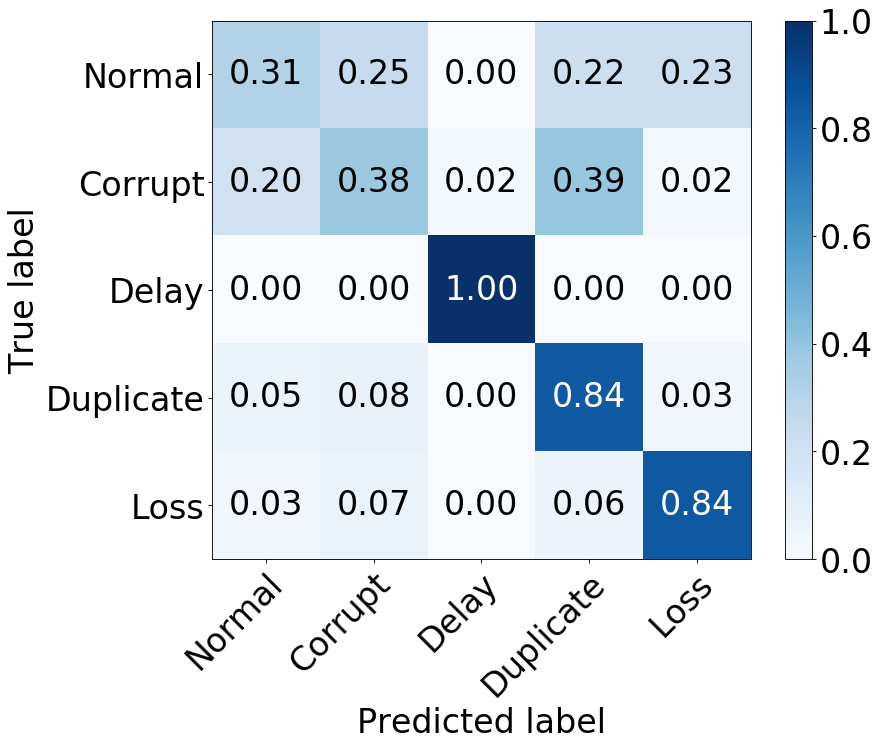

In [31]:

ch_predicted_labels = model.predict(ch_test_data)
report = classification_report(ch_test_labels, np.argmax(ch_predicted_labels, axis=1), output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("NN/EMULAB/emulab_model_ch_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(ch_test_labels, np.argmax(ch_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/EMULAB/emulab_model_ch_data_NN.pdf')
plt.show()



In [32]:


# # prefix = "../../DataSet/ch/test";
# # ch_normal = get_dataset(prefix,"","/normal")
# # ch_corrupt_001 = get_dataset(prefix,"","/corrupt_0.01")
# # ch_corrupt_005 = get_dataset(prefix,"","/corrupt_0.05")
# # ch_corrupt_01 = get_dataset(prefix,"","/corrupt_0.1")
# # ch_corrupt_05 = get_dataset(prefix,"","/corrupt_0.5")

# # ch_delay_1_1 = get_dataset(prefix,"","/delay_100_var_20")
# # ch_delay_5_2 = get_dataset(prefix,"","/delay_5_var_2")
# # ch_delay_10_5 = get_dataset(prefix,"","/delay_10_var_5")
# # ch_delay_25_20 = get_dataset(prefix,"","/delay_25_var_20")

# # ch_loss_001 = get_dataset(prefix,"","/loss_0.01")
# # ch_loss_005 = get_dataset(prefix,"","/loss_0.05")
# # ch_loss_01 = get_dataset(prefix,"","/loss_0.1")
# # ch_loss_05 = get_dataset(prefix,"","/loss_0.5")

# # ch_duplicate_001 = get_dataset(prefix,"","/duplicate_0.01")
# # ch_duplicate_005 = get_dataset(prefix,"","/duplicate_0.05")
# # ch_duplicate_01 = get_dataset(prefix,"","/duplicate_0.1")
# # ch_duplicate_05 = get_dataset(prefix,"","/duplicate_0.5")

 

# # l1  = np.ones(len(ch_normal  ))    *1

# # l2  = np.ones(len(ch_corrupt_001  ))   *2
# # l3  = np.ones(len(ch_corrupt_005  ))   *2
# # l4  = np.ones(len(ch_corrupt_01  ))   *2
# # l5  = np.ones(len(ch_corrupt_05  ))   *2

# # l6  = np.ones(len(ch_delay_1_1))   *3
# # l7  = np.ones(len(ch_delay_5_2))   *3
# # l8  = np.ones(len(ch_delay_10_5))  *3
# # l9  = np.ones(len(ch_delay_25_20)) *3

# # l10  = np.ones(len(ch_loss_001 ) )   *5
# # l11  = np.ones(len(ch_loss_005 ) )   *5
# # l12  = np.ones(len(ch_loss_01 ) )   *5
# # l13  = np.ones(len(ch_loss_05))      *5

# # l14 = np.ones(len(ch_duplicate_001 ) )    *4
# # l15  = np.ones(len(ch_duplicate_005 ) )   *4
# # l16  = np.ones(len(ch_duplicate_01 ) )   *4
# # l17  = np.ones(len(ch_duplicate_05 ) )   *4



# # ch_data = np.concatenate((ch_normal,
# #     ch_corrupt_001,
# #     ch_corrupt_005,
# #     ch_corrupt_01,
# #     ch_corrupt_05,                
# #     ch_delay_1_1,
# #     ch_delay_5_2,
# #     ch_delay_10_5,
# #     ch_delay_25_20,
# #     ch_loss_001,
# #     ch_loss_005,
# #     ch_loss_01,
# #     ch_loss_05,
# #     ch_duplicate_001,
# #     ch_duplicate_005,
# #     ch_duplicate_01,
# #     ch_duplicate_05))

# # pandas_ch = pd.DataFrame(data=ch_data, 
# #               columns=data_field_labels)

# # # pca = PCA(n_components=20)

# # # ch_data = pca.fit_transform(pandas_ch)
# # ch_data = PowerTransformer().fit_transform(pandas_ch)



# # ch_anom_type_data_labels = np.concatenate((l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17))
# # ch_anom_type_data_labels = pd.DataFrame(data=ch_anom_type_data_labels)
# # ch_anom_type_data_labels = ch_anom_type_data_labels.values.ravel()



# # A = ["50","100","200","400","500","600","800"]

# # emulab_normal = []
# # emulab_corrupt_001 = []
# # emulab_corrupt_005 = []
# # emulab_corrupt_01 = []
# # emulab_corrupt_05 = []

# # emulab_delay_1_1 = []
# # emulab_delay_5_2 = []
# # emulab_delay_10_5 = []
# # emulab_delay_25_20 = []

# # emulab_loss_001 = []
# # emulab_loss_005 = []
# # emulab_loss_01 = []
# # emulab_loss_05 =[]

# # emulab_duplicate_001 = []
# # emulab_duplicate_005 =[]
# # emulab_duplicate_01 = []
# # emulab_duplicate_05 = []


# # prefix = "../../DataSet/emulab/true/bridge/";
# # emulab_normal = get_dataset(prefix,"","/normal")
# # emulab_corrupt_001 = get_dataset(prefix,"","/corrupt_0.01")
# # emulab_corrupt_005 = get_dataset(prefix,"","/corrupt_0.05")
# # emulab_corrupt_01 = get_dataset(prefix,"","/corrupt_0.1")
# # emulab_corrupt_05 = get_dataset(prefix,"","/corrupt_0.5")

# # emulab_delay_1_1 = get_dataset(prefix,"","/delay_1_var_1")
# # emulab_delay_5_2 = get_dataset(prefix,"","/delay_5_var_2")
# # emulab_delay_10_5 = get_dataset(prefix,"","/delay_10_var_5")
# # emulab_delay_25_20 = get_dataset(prefix,"","/delay_25_var_20")

# # emulab_loss_001 = get_dataset(prefix,"","/loss_0.01")
# # emulab_loss_005 = get_dataset(prefix,"","/loss_0.05")
# # emulab_loss_01 = get_dataset(prefix,"","/loss_0.1")
# # emulab_loss_05 = get_dataset(prefix,"","/loss_0.5")

# # emulab_duplicate_001 = get_dataset(prefix,"","/duplicate_0.01")
# # emulab_duplicate_005 = get_dataset(prefix,"","/duplicate_0.05")
# # emulab_duplicate_01 = get_dataset(prefix,"","/duplicate_0.1")
# # emulab_duplicate_05 = get_dataset(prefix,"","/duplicate_0.5")

 

# # # for a in A:
# # #     emulab_normal = np.concatenate((emulab_normal,get_dataset(prefix,a,"/normal")))
    
# # #     emulab_corrupt_001= np.concatenate((get_dataset(prefix,a,"/corrupt_0.01"),emulab_corrupt_001))
# # #     emulab_corrupt_005= np.concatenate((get_dataset(prefix,a,"/corrupt_0.05"),emulab_corrupt_005))
# # #     emulab_corrupt_01= np.concatenate((get_dataset(prefix,a,"/corrupt_0.1"),emulab_corrupt_01))
# # #     emulab_corrupt_05= np.concatenate((get_dataset(prefix,a,"/corrupt_0.5"),emulab_corrupt_05))
                                 
# # #     emulab_delay_1_1= np.concatenate((get_dataset(prefix,a,"/delay_1_var_1"),emulab_delay_1_1))
# # #     emulab_delay_5_2= np.concatenate((get_dataset(prefix,a,"/delay_5_var_2"),emulab_delay_5_2))
# # #     emulab_delay_10_5= np.concatenate((get_dataset(prefix,a,"/delay_100_var_20"),emulab_delay_10_5))
# # #     emulab_delay_25_20= np.concatenate((get_dataset(prefix,a,"/delay_25_var_20"),emulab_delay_25_20))
    
# # #     emulab_loss_001= np.concatenate((get_dataset(prefix,a,"/loss_0.01"),emulab_loss_001))
# # #     emulab_loss_005= np.concatenate((get_dataset(prefix,a,"/loss_0.05"),emulab_loss_005))
# # #     emulab_loss_01= np.concatenate((get_dataset(prefix,a,"/loss_0.1"),emulab_loss_01))
# # #     emulab_loss_05= np.concatenate((get_dataset(prefix,a,"/loss_0.5"),emulab_loss_05))
    
# # #     emulab_duplicate_001 = np.concatenate((get_dataset(prefix,a,"/duplicate_0.01"),emulab_duplicate_001))
# # #     emulab_duplicate_005 = np.concatenate((get_dataset(prefix,a,"/duplicate_0.05"),emulab_duplicate_005))
# # #     emulab_duplicate_01 = np.concatenate((get_dataset(prefix,a,"/duplicate_0.1"),emulab_duplicate_01))
# # #     emulab_duplicate_05 = np.concatenate((get_dataset(prefix,a,"/duplicate_0.5"),emulab_duplicate_05))

    

# # l1  = np.ones(len(emulab_normal  ))    *1

# # l2  = np.ones(len(emulab_corrupt_001  ))   *2
# # l3  = np.ones(len(emulab_corrupt_005  ))   *2
# # l4  = np.ones(len(emulab_corrupt_01  ))   *2
# # l5  = np.ones(len(emulab_corrupt_05  ))   *2

# # l6  = np.ones(len(emulab_delay_1_1))   *3
# # l7  = np.ones(len(emulab_delay_5_2))   *3
# # l8  = np.ones(len(emulab_delay_10_5))  *3
# # l9  = np.ones(len(emulab_delay_25_20)) *3

# # l10  = np.ones(len(emulab_loss_001 ) )   *5
# # l11  = np.ones(len(emulab_loss_005 ) )   *5
# # l12  = np.ones(len(emulab_loss_01 ) )   *5
# # l13  = np.ones(len(emulab_loss_05))      *5

# # l14 = np.ones(len(emulab_duplicate_001 ) )    *4
# # l15  = np.ones(len(emulab_duplicate_005 ) )   *4
# # l16  = np.ones(len(emulab_duplicate_01 ) )   *4
# # l17  = np.ones(len(emulab_duplicate_05 ) )   *4






# # emulab_data = np.concatenate((emulab_normal,
# #     emulab_corrupt_001,
# #     emulab_corrupt_005,
# #     emulab_corrupt_01,
# #     emulab_corrupt_05,                
# #     emulab_delay_1_1,
# #     emulab_delay_5_2,
# #     emulab_delay_10_5,
# #     emulab_delay_25_20,
# #     emulab_loss_001,
# #     emulab_loss_005,
# #     emulab_loss_01,
# #     emulab_loss_05,
# #     emulab_duplicate_001,
# #     emulab_duplicate_005,
# #     emulab_duplicate_01,
# #     emulab_duplicate_05))

# # pandas_emulab = pd.DataFrame(data=emulab_data, 
# #               columns=data_field_labels)

# # # emulab_data = pca.fit_transform(pandas_emulab)
# # emulab_data = PowerTransformer().fit_transform(pandas_emulab)



# # emulab_anom_type_data_labels = np.concatenate((l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17))
# # emulab_anom_type_data_labels = pd.DataFrame(data=emulab_anom_type_data_labels)
# # emulab_anom_type_data_labels = emulab_anom_type_data_labels.values.ravel()






# hpc_normal = get_dataset("../../DataSet/hpc/normal")
# hpc_corr_01 = get_dataset("../../DataSet/hpc/corrupt_0.1perc")
# hpc_corr_05 = get_dataset("../../DataSet/hpc/corrupt_0.5perc")
# hpc_corr_10 = get_dataset("../../DataSet/hpc/corrupt_1.0perc")
# hpc_delay_1_1 = get_dataset("../../DataSet/hpc/delay_1_var_1")
# hpc_delay_5_2 = get_dataset("../../DataSet/hpc/delay_5_var_2")
# hpc_delay_10_5 = get_dataset("../../DataSet/hpc/delay_10_var_5")
# hpc_delay_25_20 = get_dataset("../../DataSet/hpc/delay_25_var_20")
# hpc_drop_01 = get_dataset("../../DataSet/hpc/loss_5perc")
# hpc_drop_001 = get_dataset("../../DataSet/hpc/loss_10perc")
# hpc_drop_0005 = get_dataset("../../DataSet/hpc/loss_15perc")
# # hpc_dup_1 = get_dataset("../../DataSet/hpc/dup_10perc")
# # hpc_dup_2 = get_dataset("../../DataSet/hpc/dup_20perc")


# hpc_corrupt_001 = get_dataset("../../DataSet/hpc/corrupt_0.01")
# hpc_corrupt_005 = get_dataset("../../DataSet/hpc/corrupt_0.05")
# hpc_corrupt_01 = get_dataset("../../DataSet/hpc/corrupt_0.1")
# hpc_corrupt_05 = get_dataset("../../DataSet/hpc/corrupt_0.5")
# hpc_duplicate_001 = get_dataset("../../DataSet/hpc/duplicate_0.01")
# hpc_duplicate_005 = get_dataset("../../DataSet/hpc/duplicate_0.05")
# hpc_duplicate_01 = get_dataset("../../DataSet/hpc/duplicate_0.1")
# hpc_duplicate_05 = get_dataset("../../DataSet/hpc/duplicate_0.5")
# hpc_loss_001 = get_dataset("../../DataSet/hpc/loss_0.01")
# hpc_loss_005 = get_dataset("../../DataSet/hpc/loss_0.05")
# hpc_loss_01 = get_dataset("../../DataSet/hpc/loss_0.1")
# hpc_loss_05 = get_dataset("../../DataSet/hpc/loss_0.5")



# hpc_l1  = np.ones(len(hpc_normal  ))    *1
# hpc_l2  = np.ones(len(hpc_corr_01  ))   *2
# hpc_l3  = np.ones(len(hpc_corr_05  ))   *2
# hpc_l4  = np.ones(len(hpc_corr_10  ))   *2
# hpc_l5  = np.ones(len(hpc_corrupt_001  ))   *2
# hpc_l6  = np.ones(len(hpc_corrupt_005  ))   *2
# hpc_l7  = np.ones(len(hpc_corrupt_01  ))   *2
# hpc_l8  = np.ones(len(hpc_corrupt_05  ))   *2
# hpc_l9  = np.ones(len(hpc_delay_1_1))   *3
# hpc_l10  = np.ones(len(hpc_delay_5_2))   *3
# hpc_l11  = np.ones(len(hpc_delay_10_5))  *3
# hpc_l12  = np.ones(len(hpc_delay_25_20)) *3
# hpc_l13  = np.ones(len(hpc_drop_01))     *5
# hpc_l14  = np.ones(len(hpc_drop_001))    *5
# hpc_l15  = np.ones(len(hpc_drop_0005))   *5
# hpc_l16  = np.ones(len(hpc_loss_001))   *5
# hpc_l17  = np.ones(len(hpc_loss_005))   *5
# hpc_l18  = np.ones(len(hpc_loss_01))   *5
# hpc_l19  = np.ones(len(hpc_loss_05))   *5
# # hpc_l20  = np.ones(len(hpc_dup_1))       *4
# # hpc_l21  = np.ones(len(hpc_dup_2))       *4
# hpc_l22  = np.ones(len(hpc_duplicate_001))       *4
# hpc_l23  = np.ones(len(hpc_duplicate_005))       *4
# hpc_l24  = np.ones(len(hpc_duplicate_01))       *4
# hpc_l25  = np.ones(len(hpc_duplicate_05))       *4

# hpc_data = np.concatenate((hpc_normal, 
#                            hpc_corr_01, hpc_corr_05, hpc_corr_10,
#                            hpc_corrupt_001,hpc_corrupt_005,hpc_corrupt_01,hpc_corrupt_05,
#                            hpc_delay_1_1, hpc_delay_5_2,hpc_delay_10_5,hpc_delay_25_20,
#                            hpc_drop_01, hpc_drop_001, hpc_drop_0005,
#                            hpc_loss_001,hpc_loss_005,hpc_loss_01,hpc_loss_05
#                            ,hpc_duplicate_001,hpc_duplicate_005,hpc_duplicate_01,hpc_duplicate_05))

# # hpc_data = np.concatenate((hpc_normal, 
# #                            hpc_corrupt_001,hpc_corrupt_005,hpc_corrupt_01,hpc_corrupt_05,
# #                            hpc_delay_1_1, hpc_delay_5_2,hpc_delay_10_5,hpc_delay_25_20,
# #                            hpc_loss_001,hpc_loss_005,hpc_loss_01,hpc_loss_05,hpc_duplicate_001,hpc_duplicate_005,hpc_duplicate_01,hpc_duplicate_05))


# # hpc_anom_type_data_labels = np.concatenate((hpc_l1, hpc_l5, 
# #                                             hpc_l6, hpc_l7, hpc_l8, 
# #                                             hpc_l9, hpc_l10, hpc_l11, 
# #                                             hpc_l12, hpc_l16, 
# #                                             hpc_l17, hpc_l18,hpc_l19, hpc_l22,hpc_l23,hpc_l24,hpc_l25))

# hpc_anom_type_data_labels = np.concatenate((hpc_l1, hpc_l2, hpc_l3,hpc_l4,hpc_l5,
#                                             hpc_l6, hpc_l7, hpc_l8, 
#                                             hpc_l9, hpc_l10, hpc_l11,
#                                             hpc_l12,hpc_l13,hpc_l14,hpc_l15, hpc_l16, 
#                                             hpc_l17, hpc_l18,hpc_l19,hpc_l22,hpc_l23,hpc_l24
#                                             ,hpc_l25))


# pandas_hpc = pd.DataFrame(data=hpc_data, 
#               columns=data_field_labels)

# # hpc_data = pca.fit_transform(pandas_hpc)
# #hpc_data = PowerTransformer().fit_transform(pandas_hpc)


# # hpc_data = MinMaxScaler().fit_transform(hpc_data)


# hpc_anom_type_data_labels = pd.DataFrame(data=hpc_anom_type_data_labels)
# hpc_anom_type_data_labels = hpc_anom_type_data_labels.values.ravel()


# print(pandas_hpc.shape)
# print(hpc_anom_type_data_labels.shape)

# dtn_normal = get_dataset("../../DataSet/dtn/FINAL_DATA/normal")
# dtn_normal2 = get_dataset("../../DataSet/dtn/DTN_LONG_DATA/normal")
# dtn_corr_01 = get_dataset("../../DataSet/dtn/FINAL_DATA/corrupt_0.1perc")
# dtn_corr_05 = get_dataset("../../DataSet/dtn/FINAL_DATA/corrupt_0.5perc")
# dtn_corr_10 = get_dataset("../../DataSet/dtn/FINAL_DATA/corrupt_1.0perc")
# dtn_delay_1_1 = get_dataset("../../DataSet/dtn/FINAL_DATA/delay_1_var_1")
# dtn_delay_5_2 = get_dataset("../../DataSet/dtn/FINAL_DATA/delay_5_var_2")
# dtn_delay_10_5 = get_dataset("../../DataSet/dtn/FINAL_DATA/delay_10_var_5")
# dtn_delay_25_20 = get_dataset("../../DataSet/dtn/FINAL_DATA/delay_25_var_20")
# dtn_drop_01 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_1perc")
# dtn_drop_5 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_5perc")
# dtn_drop_10 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_10perc")
# dtn_drop_15 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_15perc")
# # dtn_dup_01 = get_dataset("../../DataSet/dtn/FINAL_DATA/dup_0.1perc")
# # dtn_dup_1 = get_dataset("../../DataSet/dtn/FINAL_DATA/dup_1perc")
# # dtn_dup_2 = get_dataset("../../DataSet/dtn/FINAL_DATA/dup_2perc")

# dtn_corrupt_001 = get_dataset("../../DataSet/dtn/FINAL_DATA/corrupt_0.01")
# dtn_corrupt_005 = get_dataset("../../DataSet/dtn/FINAL_DATA/corrupt_0.05")
# dtn_corrupt_01 = get_dataset("../../DataSet/dtn/FINAL_DATA/corrupt_0.1")
# dtn_corrupt_05 = get_dataset("../../DataSet/dtn/FINAL_DATA/corrupt_0.5")
# dtn_duplicate_001 = get_dataset("../../DataSet/dtn/FINAL_DATA/duplicate_0.01")
# dtn_duplicate_005 = get_dataset("../../DataSet/dtn/FINAL_DATA/duplicate_0.05")
# dtn_duplicate_01 = get_dataset("../../DataSet/dtn/FINAL_DATA/duplicate_0.1")
# dtn_duplicate_05 = get_dataset("../../DataSet/dtn/FINAL_DATA/duplicate_0.5")
# dtn_loss_001 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_0.01")
# dtn_loss_005 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_0.05")
# dtn_loss_01 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_0.1")
# dtn_loss_05 = get_dataset("../../DataSet/dtn/FINAL_DATA/loss_0.5")


# l1  = np.ones(len(dtn_normal)+len(dtn_normal2)) *1
# l2  = np.ones(len(dtn_corr_01  ))   *2
# l3  = np.ones(len(dtn_corr_05  ))   *2
# l4  = np.ones(len(dtn_corr_10  ))   *2
# l5  = np.ones(len(dtn_corrupt_001  ))  *2
# l6  = np.ones(len(dtn_corrupt_005  ))  *2
# l7  = np.ones(len(dtn_corrupt_01  ))   *2
# l8  = np.ones(len(dtn_corrupt_05  ))   *2
# l9  = np.ones(len(dtn_delay_1_1))   *3
# l10  = np.ones(len(dtn_delay_5_2))   *3
# l11  = np.ones(len(dtn_delay_10_5))  *3
# l12  = np.ones(len(dtn_delay_25_20)) *3
# l13  = np.ones(len(dtn_drop_01 ) ) *5
# l14  = np.ones(len(dtn_drop_5) )   *5
# l15  = np.ones(len(dtn_drop_10) )  *5
# l16 = np.ones(len(dtn_drop_15) )   *5
# l17  = np.ones(len(dtn_loss_001))  *5
# l18  = np.ones(len(dtn_loss_005))  *5
# l19  = np.ones(len(dtn_loss_01))   *5
# l20  = np.ones(len(dtn_loss_05))   *5
# # l21  = np.ones(len(dtn_dup_01))    *4
# # l22  = np.ones(len(dtn_dup_1))     *4
# # l23  = np.ones(len(dtn_dup_2))     *4
# l24  = np.ones(len(dtn_duplicate_001)) *4
# l25  = np.ones(len(dtn_duplicate_005))*4
# l26  = np.ones(len(dtn_duplicate_01)) *4
# l27  = np.ones(len(dtn_duplicate_05)) *4




# dtn_data = np.concatenate((dtn_normal, dtn_normal2,
#                            dtn_corr_01, dtn_corr_05, dtn_corr_10,
#                            dtn_corrupt_001, dtn_corrupt_005, dtn_corrupt_01, dtn_corrupt_05, 
#                            dtn_delay_1_1, dtn_delay_5_2,dtn_delay_10_5,dtn_delay_25_20,
#                            dtn_drop_01, dtn_drop_5, dtn_drop_10, dtn_drop_15, dtn_loss_001,
#                            dtn_loss_005, dtn_loss_01, dtn_loss_05,
#                            dtn_duplicate_001,
#                            dtn_duplicate_005, dtn_duplicate_01, dtn_duplicate_05))



# # dtn_data = np.concatenate(( dtn_normal,
# #                            dtn_corrupt_001, dtn_corrupt_005, dtn_corrupt_01, dtn_corrupt_05, 
# #                            dtn_delay_1_1, dtn_delay_5_2,dtn_delay_10_5,dtn_delay_25_20,
# #                  dtn_loss_001,
# #                            dtn_loss_005, dtn_loss_01, dtn_loss_05,dtn_duplicate_001,
# #                            dtn_duplicate_005, dtn_duplicate_01, dtn_duplicate_05))
# print("###########")
# print(data_field_labels)
# print("###########")
# pandas_dtn = pd.DataFrame(data=dtn_data, 
#               columns=data_field_labels)


# #dtn_data = PowerTransformer().fit_transform(pandas_dtn)
# # dtn_data = pca.fit_transform(pandas_dtn)


# # dtn_data = MinMaxScaler().fit_transform(dtn_data)



# dtn_anom_type_data_labels = np.concatenate((l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14,l15,
#                                            l16, l17, l18, l19, l20,l24,l25,l26,l27))

# # dtn_anom_type_data_labels = np.concatenate((l1, l5, l6, l7, l8, l9, l10, l11, l12
# #                                             , l17, l18, l19, l20, l24,l25,l26,l27))

# dtn_anom_type_data_labels = pd.DataFrame(data=dtn_anom_type_data_labels)
# dtn_anom_type_data_labels = dtn_anom_type_data_labels.values.ravel()


# print(pandas_dtn.shape)
# print(dtn_anom_type_data_labels.shape)

# INPUT_SIZE = ch_data.shape[1]
# ENCODING_SIZE = 10
# input_img = Input(shape=(INPUT_SIZE,))
# encoded = Dense(80, activation='relu')(input_img)
# encoded = Dense(50, activation='relu')(encoded)

# encoded = Dense(ENCODING_SIZE, activation='relu')(encoded)
 
# decoded = Dense(50, activation='relu')(encoded)
# decoded = Dense(80, activation='relu')(decoded)
# decoded = Dense(INPUT_SIZE, activation='relu')(decoded)
# autoencoder = Model(input_img, decoded)

# autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# autoencoder.fit(dtn_data, dtn_data, epochs=10, batch_size=256, shuffle=True, validation_split=0.2)
# autoencoder.fit(hpc_data, hpc_data, epochs=10, batch_size=256, shuffle=True, validation_split=0.2)

# hpc_data = autoencoder.predict(hpc_data)
# dtn_data = autoencoder.predict(dtn_data)


# dtn_data = PowerTransformer().fit_transform(pandas_dtn)
# hpc_data = PowerTransformer().fit_transform(pandas_hpc)



# dtn_train_data, dtn_test_data, dtn_train_labels, dtn_test_labels = train_test_split(dtn_data, 
#                                                                    dtn_anom_type_data_labels, random_state=seed)
# dtn_train_data, dtn_train_labels = SMOTE().fit_resample(dtn_train_data, dtn_train_labels)
# a
# hpc_train_data, hpc_test_data, hpc_train_labels, hpc_test_labels = train_test_split(hpc_data, 
#                                                                     hpc_anom_type_data_labels, random_state=seed)
# hpc_train_data, hpc_train_labels = SMOTE().fit_resample(hpc_train_data, hpc_train_labels)



Train on 5756 samples, validate on 1439 samples
Epoch 1/10
5756/5756 [==============================] - 1s 102us/step - loss: 0.1134 - accuracy: 0.9663 - val_loss: 0.0246 - val_accuracy: 0.9979
Epoch 2/10
5756/5756 [==============================] - 0s 70us/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0063 - val_accuracy: 0.9979
Epoch 3/10
5756/5756 [==============================] - 0s 64us/step - loss: 0.0118 - accuracy: 0.9955 - val_loss: 7.3499e-04 - val_accuracy: 1.0000
Epoch 4/10
5756/5756 [==============================] - 0s 83us/step - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.0113 - val_accuracy: 0.9972
Epoch 5/10
5756/5756 [==============================] - 1s 95us/step - loss: 0.0084 - accuracy: 0.9969 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 6/10
5756/5756 [==============================] - 0s 73us/step - loss: 0.0076 - accuracy: 0.9972 - val_loss: 0.0107 - val_accuracy: 0.9972


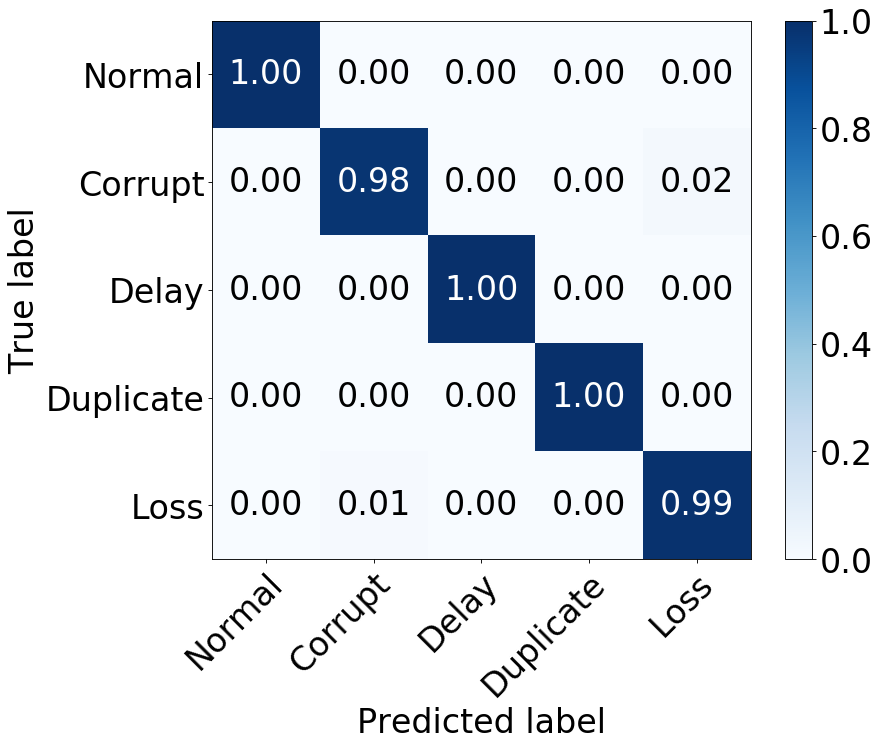

In [88]:


model = Sequential()

#get number of columns in training data
n_cols = dtn_train_data.shape[1]

dtn_train_labels_cat = to_categorical(dtn_train_labels)


model.add(Dense(300, activation='relu', input_dim=n_cols))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=3)

model.fit(dtn_train_data, dtn_train_labels_cat, validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])
# model.fit(hpc_train_data[:10], hpc_train_labels_cat[:10], validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])
# model.fit(emulab_train_data[:15], emulab_train_labels_cat[:15], validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])



dtn_predicted_labels = model.predict(dtn_test_data)
plot_confusion_matrix(dtn_test_labels, np.argmax(dtn_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/DTN/dtn_model_dtn_data_NN.pdf')
plt.show()
report = classification_report(dtn_test_labels, np.argmax(dtn_predicted_labels, axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("NN/DTN/dtn_model_dtn_data_NN_CR.csv", sep='\t')



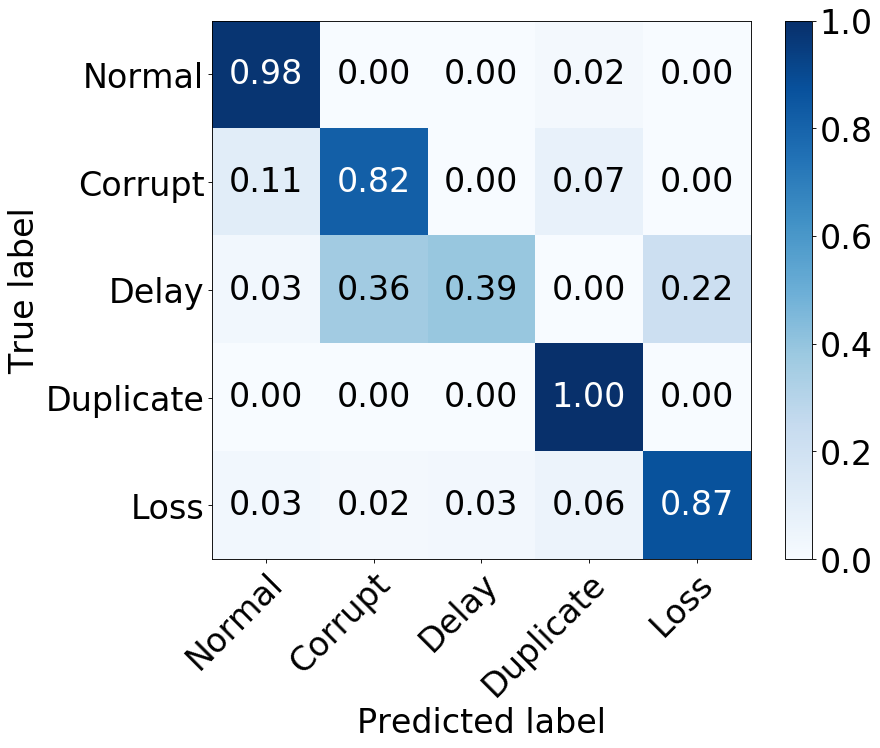

In [89]:

hpc_predicted_labels = model.predict(hpc_test_data)
report = classification_report(hpc_test_labels, np.argmax(hpc_predicted_labels, axis=1), output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("NN/DTN/dtn_model_hpc_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(hpc_test_labels, np.argmax(hpc_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/DTN/dtn_model_hpc_data_NN.pdf')
plt.show()


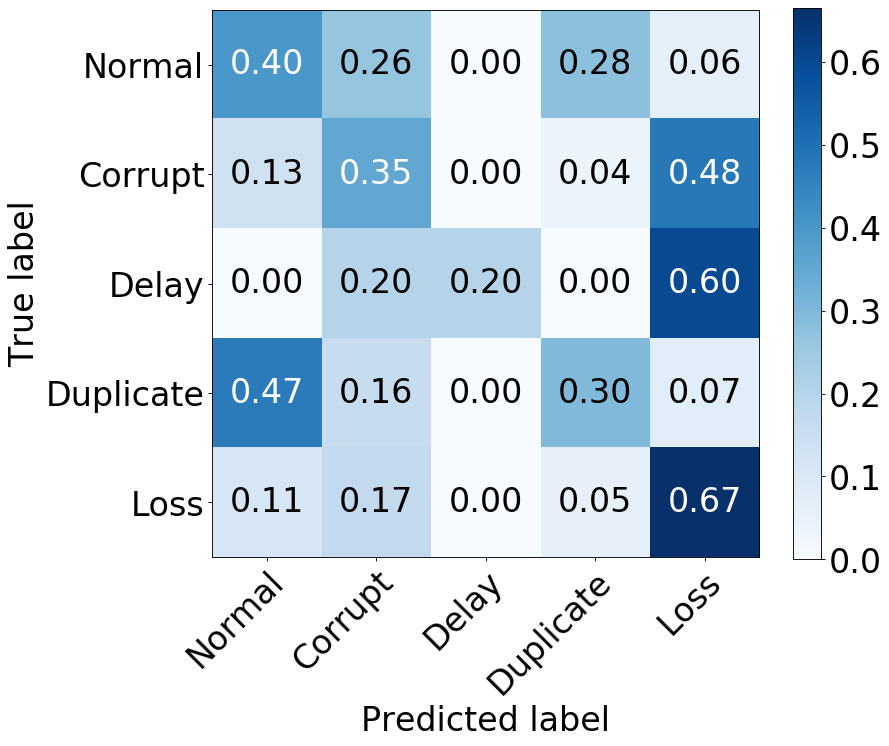

In [90]:

emulab_predicted_labels = model.predict(emulab_test_data)
report = classification_report(emulab_test_labels, np.argmax(emulab_predicted_labels, axis=1), output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("NN/DTN/dtn_model_emulab_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(emulab_test_labels, np.argmax(emulab_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/DTN/dtn_model_emulab_data_NN.pdf')
plt.show()



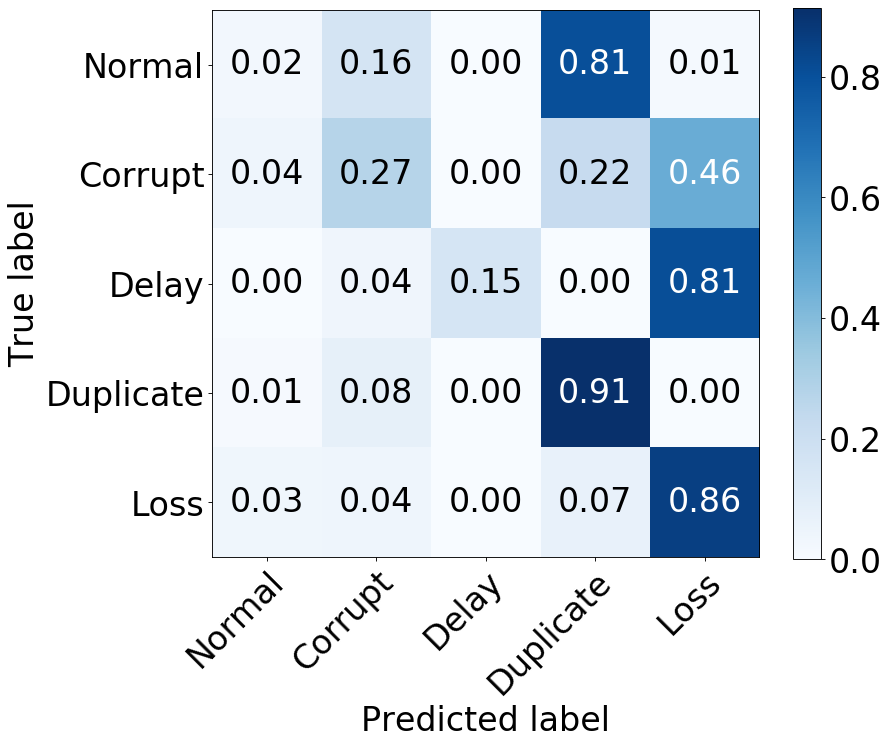

In [91]:

ch_predicted_labels = model.predict(ch_test_data)
report = classification_report(ch_test_labels, np.argmax(ch_predicted_labels, axis=1), output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("NN/DTN/dtn_model_ch_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(ch_test_labels, np.argmax(ch_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/DTN/dtn_model_ch_data_NN.pdf')
plt.show()


Train on 27364 samples, validate on 6841 samples
Epoch 1/10
27364/27364 [==============================] - 2s 82us/step - loss: 0.0843 - accuracy: 0.9726 - val_loss: 0.1819 - val_accuracy: 0.8816
Epoch 2/10
27364/27364 [==============================] - 2s 72us/step - loss: 0.0508 - accuracy: 0.9806 - val_loss: 0.1670 - val_accuracy: 0.8815
Epoch 3/10
27364/27364 [==============================] - 2s 66us/step - loss: 0.0493 - accuracy: 0.9806 - val_loss: 0.0540 - val_accuracy: 0.9984
Epoch 4/10
27364/27364 [==============================] - 2s 64us/step - loss: 0.0467 - accuracy: 0.9809 - val_loss: 0.1737 - val_accuracy: 0.8965
Epoch 5/10
27364/27364 [==============================] - 2s 73us/step - loss: 0.0455 - accuracy: 0.9816 - val_loss: 0.0783 - val_accuracy: 0.9997


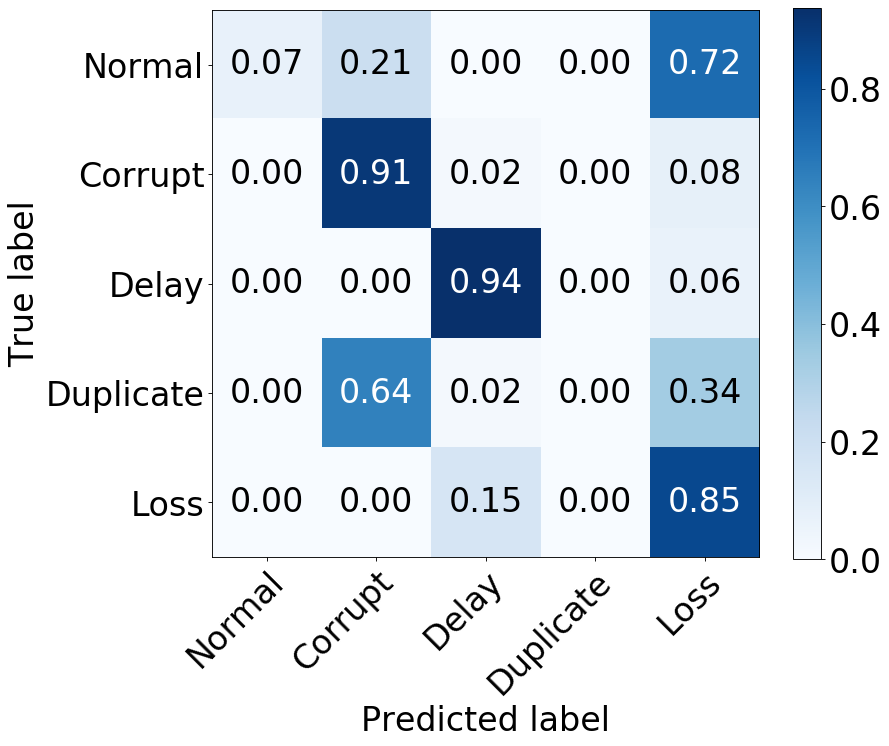

In [80]:

# #create model
model = Sequential()

#get number of columns in training data
n_cols = dtn_train_data.shape[1]

model.add(Dense(300, activation='relu', input_dim=n_cols))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

hpc_train_labels_cat = to_categorical(hpc_train_labels)



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=2)

#K.clear_session()
model.fit(hpc_train_data, hpc_train_labels_cat, validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])
# model.fit(emulab_train_data[:15], emulab_train_labels_cat[:15], validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])


dtn_predicted_labels = model.predict(dtn_test_data)
report = classification_report(dtn_test_labels, np.argmax(dtn_predicted_labels, axis=1), output_dict=True  )
df = pd.DataFrame(report).transpose()
df.to_csv("NN/HPC/hpc_model_dtn_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(dtn_test_labels, np.argmax(dtn_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/HPC/hpc_model_dtn_data_NN.pdf')
plt.show()  


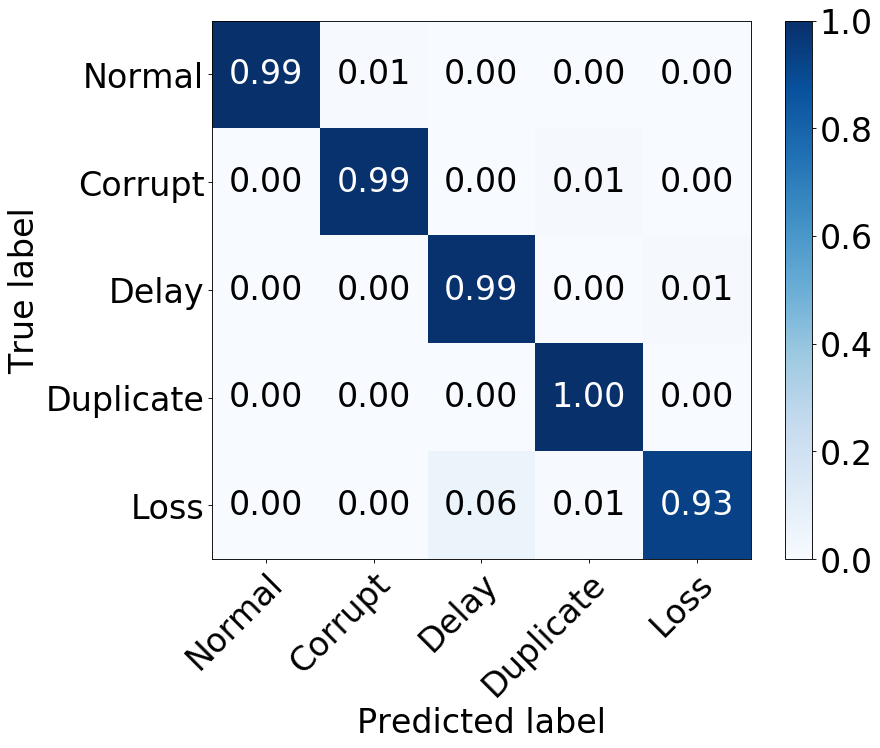

In [81]:

hpc_predicted_labels = model.predict(hpc_test_data)
report = classification_report(hpc_test_labels,  np.argmax(hpc_predicted_labels, axis=1), output_dict=True  )
df = pd.DataFrame(report).transpose()
df.to_csv("NN/HPC/hpc_model_hpc_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(hpc_test_labels, np.argmax(hpc_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/HPC/hpc_model_hpc_data_NN.pdf')
plt.show()


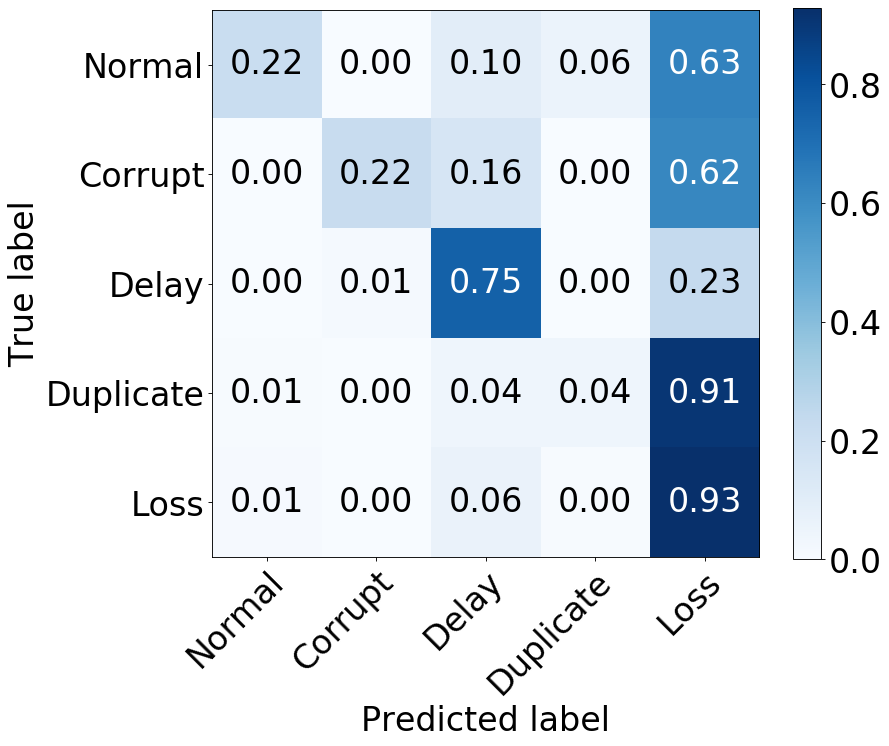

In [82]:

emulab_predicted_labels = model.predict(emulab_test_data)
report = classification_report(emulab_test_labels, np.argmax(emulab_predicted_labels, axis=1), output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("NN/HPC/hpc_model_emulab_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(emulab_test_labels, np.argmax(emulab_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/HPC/hpc_model_emullab_data_NN.pdf')
plt.show()

/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


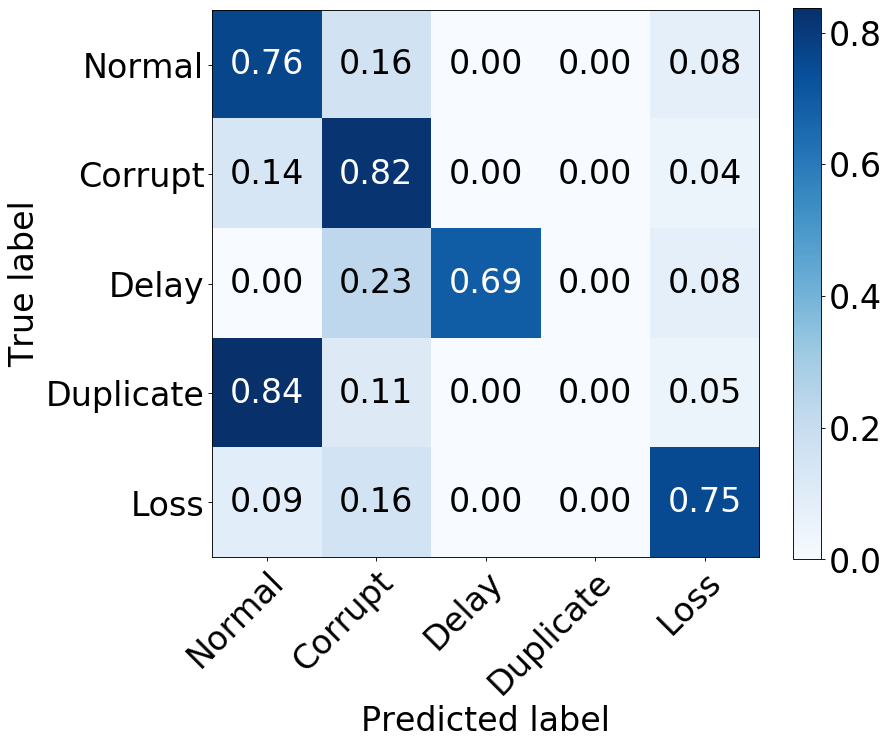

In [83]:


ch_predicted_labels = model.predict(ch_test_data)
report = classification_report(ch_test_labels, np.argmax(ch_predicted_labels, axis=1), output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("NN/HPC/hpc_model_ch_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(ch_test_labels, np.argmax(ch_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('NN/HPC/hpc_model_ch_data_NN.pdf')
plt.show()

In [110]:
import shap
shap.initjs()

In [42]:
# print(dtn_train_data[:100].shape)
# print(dtn_train_data[:100][dtn_train_labels[:100] == 3][0])
# print(dtn_train_labels[:20]==3)

In [43]:
# import shap
# shap.initjs()

# df_train_normed_summary = shap.kmeans(dtn_test_data[:400,:], 2)

# explainer = shap.KernelExplainer(model.predict,df_train_normed_summary)
# shap_values_dtn = explainer.shap_values(dtn_test_data[:400])


In [44]:
# shap.summary_plot(shap_values_dtn, dtn_test_data,feature_names = data_field_labels )
# # shap.summary_plot(shap_values_dtn[1], dtn_test_data[:400],plot_type = "dot",feature_names = data_field_labels)
# shap.summary_plot(shap_values_dtn[3], dtn_test_data[:400],plot_type = "dot",feature_names = data_field_labels)
# # shap.summary_plot(shap_values_dtn[5], dtn_test_data[:400],plot_type = "dot",feature_names = data_field_labels)




# dtn_col = pd.DataFrame(data=dtn_test_data, 
#               columns=data_field_labels)

# hpc_col = pd.DataFrame(data=hpc_test_data, 
#               columns=data_field_labels)

# emulab_col = pd.DataFrame(data=emulab_test_data, 
#               columns=data_field_labels)



In [45]:


# # print(dtn_col.head())
# print(dtn_col[dtn_test_labels==2]["c_pkt_fs"].mean())
# print(emulab_col[emulab_test_labels==4]["c_pkt_fs"].mean())

# print(dtn_col[dtn_test_labels==2]["s_sack_cnt"].mean())
# print(emulab_col[emulab_test_labels==4]["s_sack_cnt"].mean())



In [46]:
# dtn_test_data = pd.DataFrame(data=dtn_test_data, 
#               columns=data_field_labels)
# # print(dtn_test_data.iloc[17,:])
# print(model.predict(dtn_test_data.iloc[19,:].values.reshape(1,89)))
# print(dtn_test_labels[19])

# shap.force_plot(explainer.expected_value[4]
#                 , shap_values_dtn[4][19,:]
#                 , dtn_test_data.iloc[19,:], link="logit")

In [47]:


# df_train_normed_summary_hpc = shap.kmeans(hpc_train_data[:400,:], 2)

# explainer_hpc = shap.KernelExplainer(model.predict,df_train_normed_summary_hpc)
# shap_values = explainer_hpc.shap_values(hpc_train_data[:400,:])

In [48]:
# shap.summary_plot(shap_values, hpc_train_data,feature_names = data_field_labels )
# shap.summary_plot(shap_values[3], hpc_train_data[:400,:],plot_type = "dot",feature_names = data_field_labels)
# # shap.summary_plot(shap_values[2], hpc_train_data[:400,:],plot_type = "dot",feature_names = data_field_labels)
# # shap.summary_plot(shap_values[4], hpc_train_data[:400,:],plot_type = "dot",feature_names = data_field_labels)

In [49]:
# emulab_train_data = pd.DataFrame(data=emulab_train_data, 
#               columns=data_field_labels)
# print(model.predict(emulab_train_data.iloc[21,:].values.reshape(1,88)).argmax(axis=1))
# print(emulab_train_labels[21])

# shap.force_plot(explainer_emulab.expected_value[1]
#                 , shap_values[1][21,:]
#                 , emulab_train_data.iloc[21,:], link="logit")



In [111]:
df_train_normed_summary_emulab = shap.kmeans(emulab_train_data[:400], 2)

explainer_emulab = shap.KernelExplainer(model.predict,df_train_normed_summary_emulab)
shap_values_emulab = explainer_emulab.shap_values(emulab_train_data[:400,:])

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


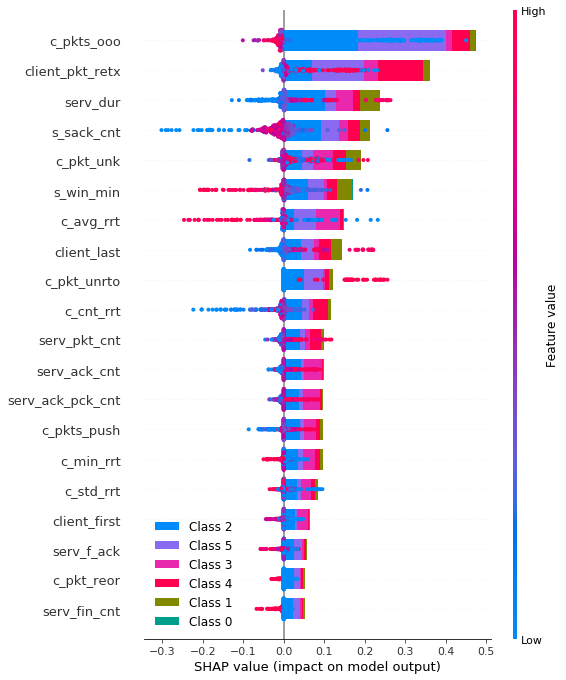

In [115]:
shap.summary_plot(shap_values_emulab, emulab_train_data,feature_names = data_field_labels,show=False )
plt.tight_layout()
plt.savefig('shap_nn_emulab.pdf')
# shap.summary_plot(shap_values_emulab[1], emulab_train_data[:400,:],plot_type = "dot",feature_names = data_field_labels)
shap.summary_plot(shap_values_emulab[4], emulab_train_data[:400],plot_type = "dot",feature_names = data_field_labels)



In [52]:

# emulab_train_data = pd.DataFrame(data=emulab_train_data, 
#               columns=data_field_labels)
# print(model.predict(emulab_train_data.iloc[140,:].values.reshape(1,87)).argmax(axis=1))

# print(model.predict(emulab_train_data.iloc[100,:].values.reshape(1,87)).argmax(axis=1))
# print(emulab_train_labels[100])

# print(emulab_train_data[140:141]["s_sack_cnt"])
# print(emulab_train_data[100:101]["s_sack_cnt"])


# shap.summary_plot(shap_values_emulab[4][140:141], emulab_train_data[140:141],plot_type = "dot",feature_names = data_field_labels)
# shap.summary_plot(shap_values_emulab[4][100:101], emulab_train_data[100:101],plot_type = "dot",feature_names = data_field_labels)


# shap.force_plot(explainer_emulab.expected_value[4]
#                 , shap_values_emulab[4][140,:]
#                 , emulab_train_data.iloc[140,:], link="logit")



In [53]:
# print(emulab_train_data.iloc[100,:]["client_bytes_retx"])

In [54]:

# emulab_col = pd.DataFrame(data=emulab_train_data, 
#               columns=data_field_labels)

# # print()
# # print((emulab_col[emulab_train_labels==4]["client_bytes_retx"]))
# # print((hpc_col[hpc_test_labels==1]["client_bytes_retx"].mean))

# # print((dtn_col[dtn_train_labels==1]["c_win_scl"].mean))
# # print((hpc_col[hpc_test_labels==1]["c_win_scl"].mean))

In [55]:
# df_train_normed_summary_ch = shap.kmeans(ch_train_data[:400], 2)

# explainer_ch = shap.KernelExplainer(model.predict,df_train_normed_summary_ch)
# shap_values_ch = explainer_ch.shap_values(ch_train_data[:400,:])

In [56]:
# shap.summary_plot(shap_values, ch_train_data,feature_names = data_field_labels )
# # shap.summary_plot(shap_values_ch[1], ch_train_data[:400,:],plot_type = "dot",feature_names = data_field_labels)
# # shap.summary_plot(shap_values_ch[2], ch_train_data[:400,:],plot_type = "dot",feature_names = data_field_labels)
# # shap.summary_plot(shap_values_ch[4], ch_train_data[:400,:],plot_type = "dot",feature_names = data_field_labels)
# shap.summary_plot(shap_values_ch[2], ch_train_data[:400,:],plot_type = "dot",feature_names = data_field_labels)
# shap.summary_plot(shap_values_ch[3], ch_train_data[:400,:],plot_type = "dot",feature_names = data_field_labels)


# # shap.summary_plot(shap_values_ch[5], ch_train_data[:400,:],plot_type = "dot",feature_names = data_field_labels)

In [57]:
# ch_col = pd.DataFrame(data=ch_train_data, 
#               columns=data_field_labels)

# print((ch_col[ch_train_labels==4]["s_sack_cnt"].mean()))

In [58]:
# ch_train_data = pd.DataFrame(data=ch_train_data, 
#               columns=data_field_labels)


# print(model.predict(ch_train_data.iloc[129,:].values.reshape(1,87)).argmax(axis=1))
# print(ch_train_labels[129])

# shap.force_plot(explainer_ch.expected_value[2]
#                 , shap_values_ch[2][129,:]
#                 , ch_train_data.iloc[129,:], link="logit")

